# Create the RLFED environment

# This is a Multi-Arm-Bandit Environment Simulation for Education

There are a few ways in which we can think about reinforcement learning problems for education. In some instances, we might think of unique content recommendations to students to optimise their learning, in other instances, we might think about solving a problem related to a tailor-made intervention for students. In this notebook, we will start with contextualising an environment that represents this problem - and contextualise the problem for the Education fit.

Before we begin, there are a few things we need to contextualise:

In the context of this RLFED (Reinforcement learning for education) environment, we are approaching the problem in the following way:
- This is a systems level problem that is being solved. 
  - That is, that the problem we are solving is about a systems level approach rather than an individual based optimisation problem. This means that we are not conserned over the specific recommendation made, but rather if a correct intervention is made.
- There are four different reward probabilities given to the environments, based on the type of student classification made. 
  - In reality, there are hundereds of different student classifications that can be given, each with their own unique interventions. We are only concerned with whether the correct recommendation is made, and not what the recommendation is.
- There are several experiments which are based around the classification problem not covered in these experiments. 
  - We assume that the students were correctly classified. In other words, we are assuming that the classification was perfect for the given student.
  - The MAB (multi armed bandit) arms each represents an intervention. Arms = recommendations
    - In the experiment, we will have 4 arms, representing the following instances: 
      - Recommendation 1 - the incorrect intervention; 
      - Recommendation 2 - an intervention with an unknown consequence; 
      - Recommendation 3 - the ideal intervention; 
      - Recommendation 4 - an intervention that may work, but not for all instances.
 
- We are assuming that all the intervention distributions per class are labelled by experts, and that the interventions are perfect. This means that we will assume that if the correct arm is being pulled for a given student (representing a correct intervention), that the correct intervention was used given to the right student.

### The system level problem
Higher education system-based interventions have the following parameters broad parameters, based on the group or category of student that the system has to accommodate. These four groups or classes of interventions that are given within higher education are dependent on the student needs and the problems they face [1; 3; 5; 12 - 18]. 

- 1) the student will pass, no matter the intervention
- 2) the student will fail, but will pass if the correct intervention is given and stand a 70% chance of passing if the intervention that may work is recommended, and 50% if an incorrect intervention or an intervention with an unknown consequence is given
- 3) the student will fail, but will only pass if the correct intervention is given, and stand a 50% chance of passing if the intervention that may work is recommended, 25% chance that an unknown intervention is recommended
- 4) the student will fail, but will only pass 50% of the time if the correct intervention is given

On average, the majority of the students who met the entry requirements for a specific degree need minimal to no input to pass their qualification. The exact number has not been agreed upon yet as a domain standard, but the majority of students that will pass, without intervention is roughly 65%. We can therefore say that 65% of a given student cohort is roughly category 1 [18 - 20].

20% of students are likely to pass if a specific or specialised intervention is given, and without such an intervention, they are 50% likely to fail, we will constitute this as category 2 [1 - 12; 15 - 17].

10 - 20% of students will fail within a given system if the right intervention is not given, and if the right intervention is given, are still likely to fail. We will group this as category 3 [1 - 12; 15 - 17].

5 - 10% of students will fail within a system due to reasons outside the control of the system. If an intervention is given to these students, they are still likely to fail with little to no chance of success. We will group this as category 4 [1 - 12; 15 - 17].

This means that we have the following categorical distribution os students in relation to the distributions they need within a system:

**Then we can say that the reward probabilities are associated with the class classifications and the different arms represent the recommendation.**

Let us further add some context and say that the system is not perfect, and we will recommend the incorrect intervention to students. As a result:

- Recommendation 1 - the incorrect intervention
- Recommendation 2 - an intervention with an unknown consequence
- Recommendation 3 - the ideal intervention
- Recommendation 4 - an intervention that may work, but not for all instances.


|Name of Category| The % distribution within cohort| Likelyhood to pass for Recommendation 1|Likelyhood to pass for Recommendation 2|Likelyhood to pass for Recommendation 3|Likelyhood to pass for Recommendation 4|
|----------------|---------------------------------|----------------------------------------|----------------------------------------|----------------------------------------|----------------------------------------|
|Category 1| 65% of cohort|100%|100%|100%|100%|
|Category 2| 20% of cohort|50%|50%|100%|70%|
|Category 3| 10% of cohort|0%|0%|100%|25%|
|Category 4| 5% of cohort |0%|0%|50%|0%|

In the first instance, we are setting up a basic environment to incorporate the aforementioned parameters. A few things to note:
1) the environment and experiments do not classify the student. This is an entirely different problem [17].

2) each of the categories will make use of a different environment (4 environments). This is so that the experiments per category and the impact of the experiments per category can be viewed separately.

3) there will be 4 choices of recommendations, which will rather represent the type of recommendations than a specific recommendation itself.

### Adding the dependencies


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### This is the basic overview of the environment, with self checks in it.



In [2]:
class Environment(object):

  def __init__(self, reward_probabilities, actual_rewards):
    if len(reward_probabilities) != len(actual_rewards):
      raise Exception(f"size of reward_probabilities : {len(reward_probabilities)} does not match size of actual rewards : {len(actual_rewards)}")

    self.reward_probabilities = reward_probabilities
    self.actual_rewards = actual_rewards
    self.k_arms = len(reward_probabilities)

  def choose_arm(self, arm):
    if arm < 0 or arm >= self.k_arms:
      raise Exception(f"arm must be between 0 and {self.k_arms -1}")

    return self.actual_rewards[arm] if np.random.random() < self.reward_probabilities[arm] else 0.0

Let us add the reward probabilities to the environment. In this instance, we are pulling 4 arms. So, let us do a sanity check. If I declare the environment and assume that I know the reward probabilities (or the distribution of the reward probabilities) and I know the actual rewards per arm, then if I pull the arm 10 times, it will resemble the distribution of each arm (more or less)

In [3]:
env = Environment(reward_probabilities=[0.6, 0.1, 0.8, 0.5], actual_rewards=[1.0, 1.0, 1.0, 1.0])

For arm (0) or the first arm, we expect 6, for the socond arm (1) we expect 1, for the third arm (2) we expect 8, and the fourth arm (3) we expect 5.

In [4]:
[env.choose_arm(0) for _ in range(10)]

[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]

In [5]:
[env.choose_arm(1) for _ in range(10)]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [6]:
[env.choose_arm(2) for _ in range(10)]

[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0]

In [7]:
[env.choose_arm(3) for _ in range(10)]

[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]

This is indeed the case, so let us move on the the next step, by defining the different environment class probabilities

# Adding context

In the above mentioned code, the environment is base skeleton and as simple as it can be. In fact, in the example above the class classifications are not even factored in. Let us recap, and assume the following example given 4 numbers:
- 1) the student will pass, no matter the intervention
- 2) the student will fail, but will pass if the correct intervention is given and stand a 70% chance of passing if the intervention that may work is recommended, and 50% if an incorrect intervention or an intervention with an unknown consequence is given
- 3) the student will fail, but will only pass if the correct intervention is given, and stand a 50% chance of passing if the intervention that may work is recommended, 25% chance that an unknown intervention is recommended
- 4) the student will fail, but will only pass 50% of the time if the correct intervention is given

**Keep in mind:**
- Arm 1; the incorrect intervention
- Arm 2; an intervention with an unknown consequence
- Arm 3; the ideal intervention
- Arm 4; an intervention that may work, but not for all instances.

To implement this, for simplicity’s sake, we will create an environment for each of the aforementioned classes of students. We will also assume that there is an expert panel that decides the interventions for each of the classes above. We are not concerned over which intervention fits with which problem and will assume that the right arm for the right intervention, follows the conditions above. Let us also say that we give the ideal intervention the majority of the time, and the incorrect intervention etc. the minority of the time

In [8]:
env1 = Environment(reward_probabilities=[1.0, 1.0, 1.0, 1.0], actual_rewards=[1.0, 1.0, 1.0, 1.0])

Next, let us build an environment for the following condition:
- 2) the student will fail, but will pass if the correct intervention is given and stand a 70% chance of passing if the intervention that may work is recommended, and 50% if an incorrect intervention or an intervention with an unknown consequence is given

Keep in mind
- Arm 1; the incorrect intervention
- Arm 2; an intervention with an unknown consequence
- Arm 3; the ideal intervention
- Arm 4; an intervention that may work, but not for all instances.

In [9]:
env2 = Environment(reward_probabilities=[0.50, 0.50, 1.0, 0.70], actual_rewards=[1.0, 1.0, 1.0, 1.0])

Next, let us build an environment for the following condition:
- 3) the student will fail, but will only pass if the correct intervention is given, and stand a 50% chance of passing if the intervention that may work is recommended, 25% chance that an unknown intervention is recommended

Keep in mind
- Arm 1; the incorrect intervention
- Arm 2; an intervention with an unknown consequence
- Arm 3; the ideal intervention
- Arm 4; an intervention that may work, but not for all instances.

In [10]:
env3 = Environment(reward_probabilities=[0.0, 0.25, 1.0, 0.5], actual_rewards=[1.0, 1.0, 1.0, 1.0])

Next, let us build an environment for the following condition:
- 4) the student will fail, but will only pass 50% of the time if the correct intervention is given

Keep in mind
- Arm 1; the incorrect intervention
- Arm 2; an intervention with an unknown consequence
- Arm 3; the ideal intervention
- Arm 4; an intervention that may work, but not for all instances.

In [11]:
env4 = Environment(reward_probabilities=[0.0, 0.0, 0.50, 0.0], actual_rewards=[1.0, 1.0, 1.0, 1.0])

# Creating the agent

In the sections below, I will play with different RL agent algorithms, starting with the baseline, an agent that just randomly "pulls" an arm, or in this context, chooses an intervention based on the classification at random. There is no thought here, the agent is just pulling arms. This is to illustrate how the overall rewards will be influences and what recommendations will be made, given the parameters

In [12]:
class RandomAgent(object):

  def __init__(self, env, max_episodes=500):
    self.env = env
    self.episodes = max_episodes

    self.q_values = np.zeros(self.env.k_arms)
    self.arm_counts = np.zeros(self.env.k_arms)
    self.arm_rewards = np.zeros(self.env.k_arms)

    self.rewards = [0.0]
    self.cum_rewards = [0.0]

  def act(self):
    for i in range(self.episodes):
      arm = np.random.choice(self.env.k_arms)
      reward = self.env.choose_arm(arm)

      self.arm_counts[arm] = self.arm_counts[arm] + 1
      self.arm_rewards[arm] = self.arm_rewards[arm] + reward

      self.q_values[arm] = self.q_values[arm] + (1/self.arm_counts[arm]) * (reward - self.q_values[arm])
      self.rewards.append(reward)
      self.cum_rewards.append(sum(self.rewards) / len(self.rewards))

    return {"arm_counts": self.arm_counts, "rewards": self.rewards, "cum_rewards": self.cum_rewards}

In [13]:
test_env1 = env1
random_agent1 = RandomAgent(test_env1)
random_agent_result1 = random_agent1.act()

In [14]:
test_env2 = env2
random_agent2 = RandomAgent(test_env2)
random_agent_result2 = random_agent2.act()

In [15]:
test_env3 = env3
random_agent3 = RandomAgent(test_env3)
random_agent_result3 = random_agent3.act()

In [16]:
test_env4 = env4
random_agent4 = RandomAgent(test_env4)
random_agent_result4 = random_agent4.act()

In [17]:
total_rewards = sum(random_agent_result1["rewards"])
print(f"Total Reward : {total_rewards}")

Total Reward : 500.0


In [18]:
print(f"Environment Reward Probabilities : {test_env1.reward_probabilities}")
print(f"Random Agent Action Values : {random_agent1.q_values}")

Environment Reward Probabilities : [1.0, 1.0, 1.0, 1.0]
Random Agent Action Values : [1. 1. 1. 1.]


<BarContainer object of 4 artists>

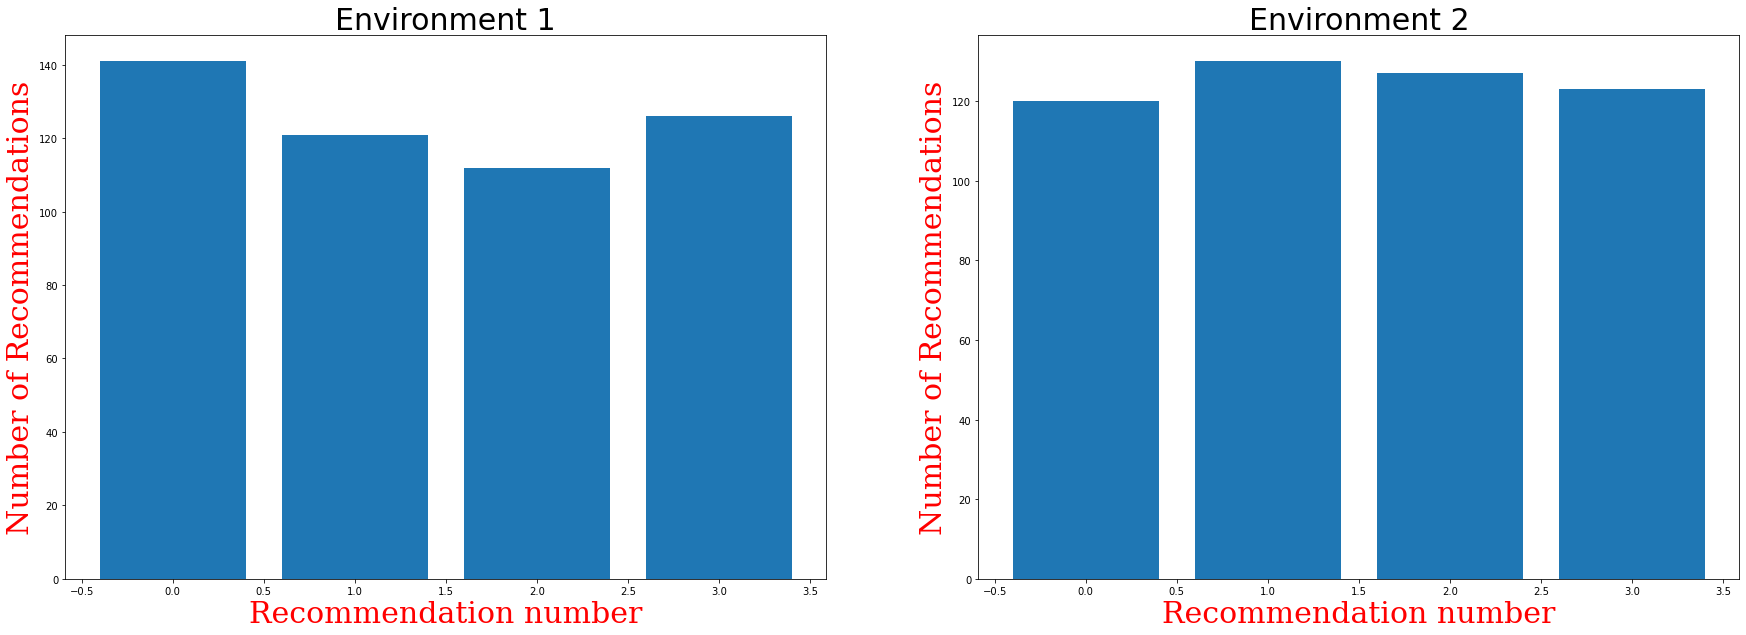

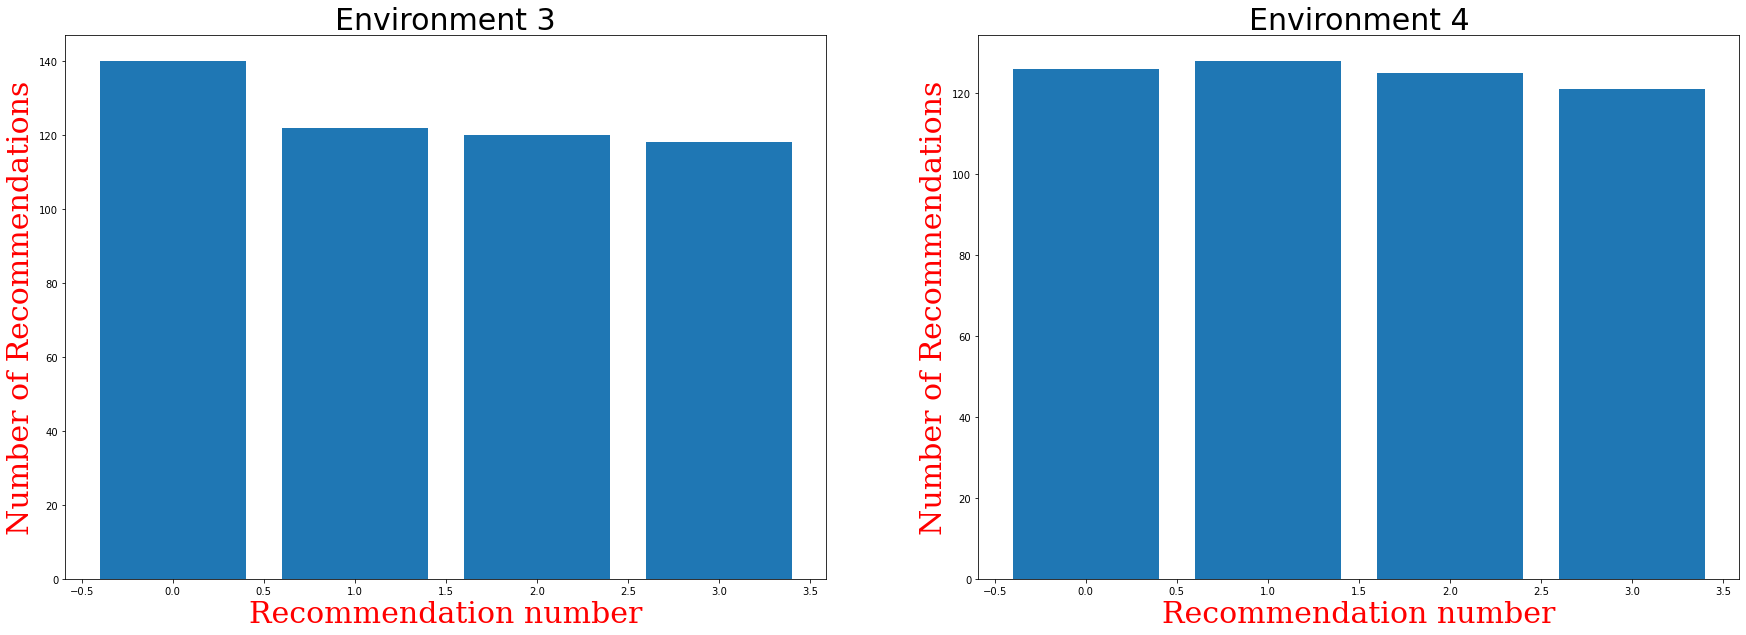

In [19]:
Rcum_rewards1 = random_agent_result1["cum_rewards"]
Rarm_counts1 = random_agent_result1["arm_counts"]

Rcum_rewards2 = random_agent_result2["cum_rewards"]
Rarm_counts2 = random_agent_result2["arm_counts"]

Rcum_rewards3 = random_agent_result3["cum_rewards"]
Rarm_counts3 = random_agent_result3["arm_counts"]

Rcum_rewards4 = random_agent_result4["cum_rewards"]
Rarm_counts4 = random_agent_result4["arm_counts"]

fig = plt.figure(figsize=[30,10])

ax1 = fig.add_subplot(121)
plt.xlabel("Recommendation number", {'family':'serif','color':'red','size':30})
plt.ylabel("Number of Recommendations", {'family':'serif','color':'red','size':30})
ax1.set_title('Environment 1', fontsize=30)

ax2 = fig.add_subplot(122)
plt.xlabel("Recommendation number", {'family':'serif','color':'red','size':30})
plt.ylabel("Number of Recommendations", {'family':'serif','color':'red','size':30})
ax2.set_title('Environment 2', fontsize=30)

ax1.bar([i for i in range(len(Rarm_counts1))], Rarm_counts1)
ax2.bar([i for i in range(len(Rarm_counts2))], Rarm_counts2)

fig = plt.figure(figsize=[30,10])
ax3 = fig.add_subplot(121)
plt.xlabel("Recommendation number", {'family':'serif','color':'red','size':30})
plt.ylabel("Number of Recommendations", {'family':'serif','color':'red','size':30})
ax3.set_title('Environment 3', fontsize=30)

ax4 = fig.add_subplot(122)
plt.xlabel("Recommendation number", {'family':'serif','color':'red','size':30})
plt.ylabel("Number of Recommendations", {'family':'serif','color':'red','size':30})
ax4.set_title('Environment 4', fontsize=30)

ax3.bar([i for i in range(len(Rarm_counts3))], Rarm_counts3)
ax4.bar([i for i in range(len(Rarm_counts4))], Rarm_counts4)

As seen above, the recommendations are just randomly being pulled. 

Text(0, 0.5, 'Cumulative reward')

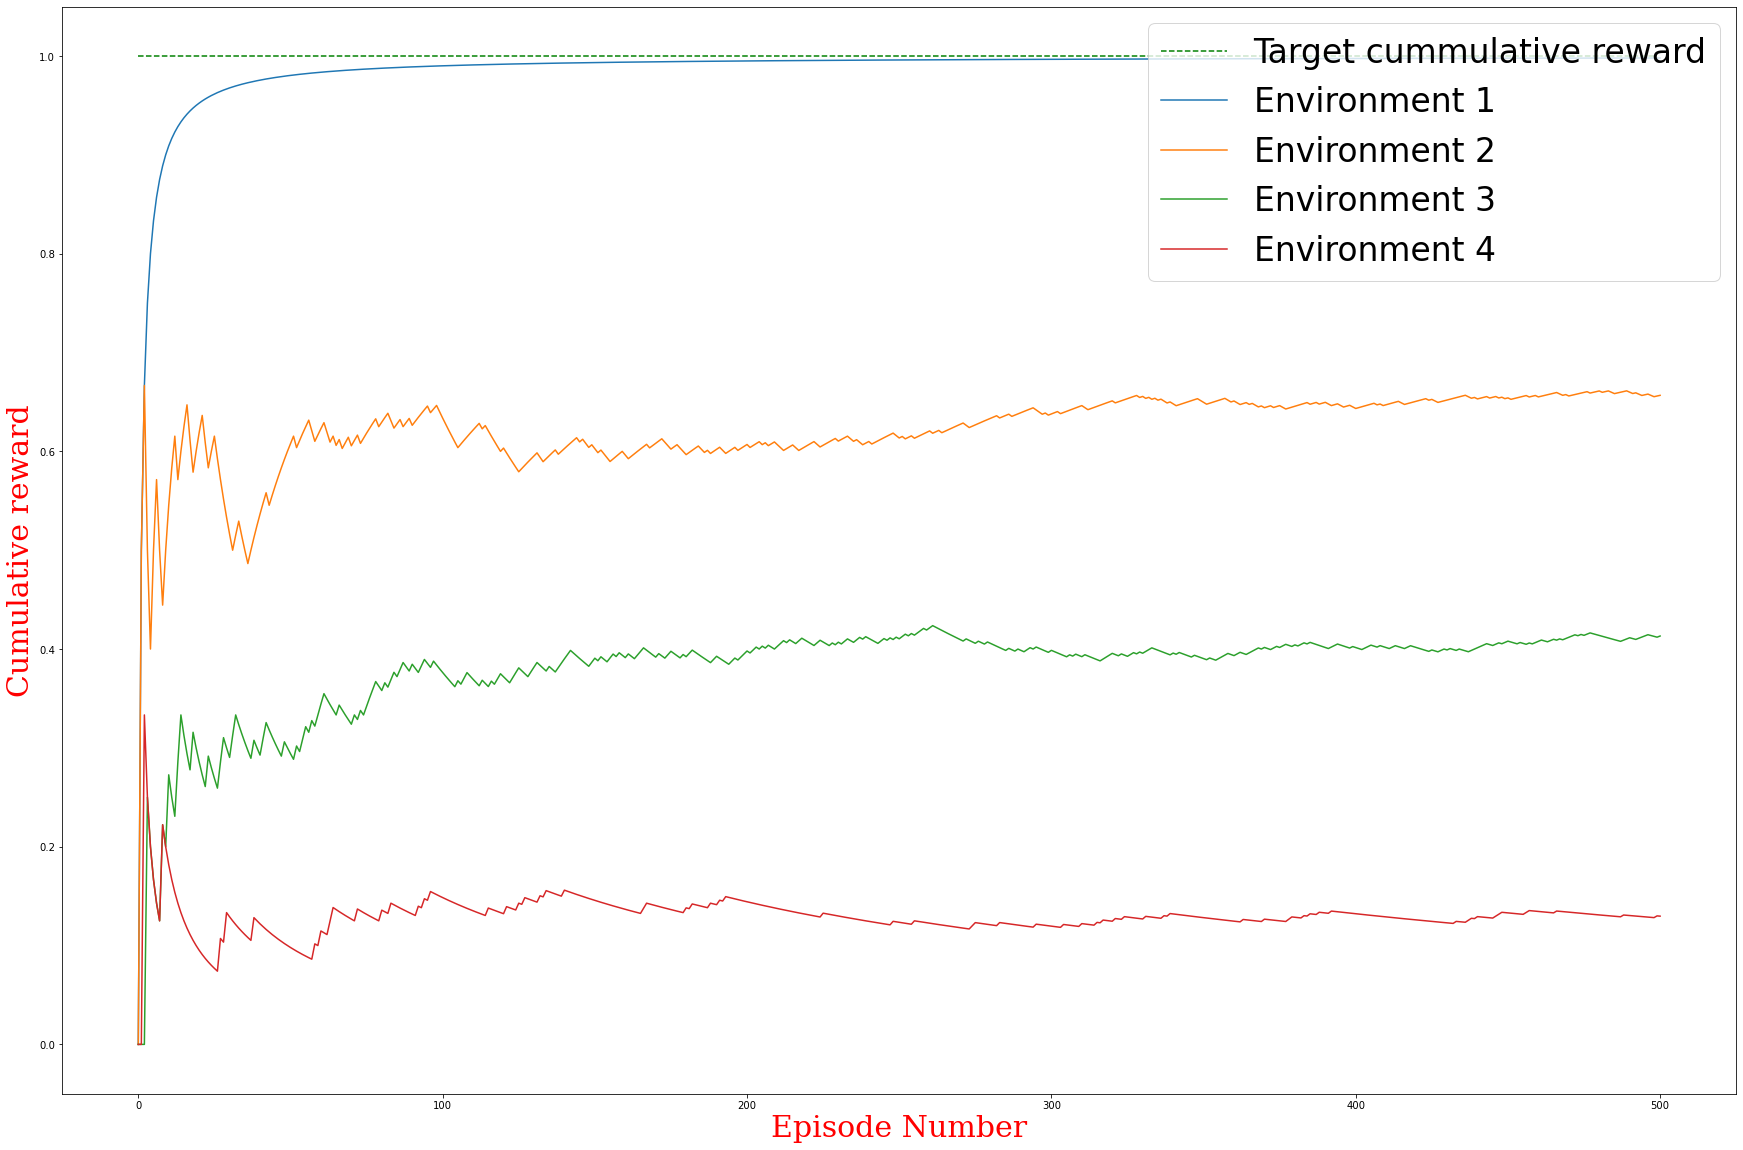

In [20]:
ax2 = plt.figure(figsize=[30,20])
plt.plot([1.0 for _ in range(random_agent1.episodes)], "g--", label="Target cummulative reward")

plt.rcParams['font.size'] = '33'

plt.plot(Rcum_rewards1, label="Environment 1")
plt.plot(Rcum_rewards2, label="Environment 2")
plt.plot(Rcum_rewards3, label="Environment 3")
plt.plot(Rcum_rewards4, label="Environment 4")

#plt.plot(ax2, label="sine")
#plt.plot(x, y2, "-r", label="cosine")
plt.legend(loc="upper right")

plt.xlabel("Episode Number", {'family':'serif','color':'red','size':30})
plt.ylabel("Cumulative reward", {'family':'serif','color':'red','size':30})

As seen above, the reward distributions matches what we expect, given that env1 should have the highest reward (given the distributions if the recommendations are randomly selected) and env4 the lowest reward, if the recommendations are chosen at random.

**Let us explore different possibilities of improving the overall rewards**

# Interpreting the baseline experiment

Obvious, students that will pass will always yield the highest reward, because they passed and them passing is mutually exclusive from the decisions of the system.

Environment two (2) and three (3) range in total reward between 40% - ~65%. It can be assumed that the majority of the interventions will come from these two environments. According to XXX et al., (2020) at least 30% of students will fail if they do not have a timeous intervention in place.

Environment four (4) illustrates the importance of having a smart intervention in place because the overall rewards are less than 20%. 

Based on these experiments, interventions in higher education require smart solutions. Students who will pass, regardless of the intervention should not congest the system. Students who will fail, unless a very specific intervention is given is part of the extreme side of the system. The majority of students that require an intervention to pass will either be from environment two (2) or environment three (3)

# Our first smart agent in this environment

There are many strategies to making an agent smarter. Let us start with some standards in the field that make this possible, starting with 

# greedy is too greedy [22; 23; 27]

In [21]:
class GreedyAgent(object):

  def __init__(self, env, max_episodes=500):
    self.env = env
    self.episodes = max_episodes

    self.q_values = np.zeros(self.env.k_arms)
    self.arm_counts = np.zeros(self.env.k_arms)
    self.arm_rewards = np.zeros(self.env.k_arms)

    self.rewards = [0.0]
    self.cum_rewards = [0.0]

  def act(self):
    for i in range(self.episodes):
      arm = np.argmax(self.q_values)
      reward = self.env.choose_arm(arm)

      self.arm_counts[arm] = self.arm_counts[arm] + 1
      self.arm_rewards[arm] = self.arm_rewards[arm] + reward

      self.q_values[arm] = self.q_values[arm] + (1/self.arm_counts[arm]) * (reward - self.q_values[arm])
      self.rewards.append(reward)
      self.cum_rewards.append(sum(self.rewards) / len(self.rewards))

    return {"arm_counts": self.arm_counts, "rewards": self.rewards, "cum_rewards": self.cum_rewards}


In [22]:
test_env1 = env1
GreedyAgent_1 = GreedyAgent(test_env1)
GreedyAgent_result1 = GreedyAgent_1.act()
total_rewards1 = sum(GreedyAgent_result1["rewards"])
print(f"Total Reward : {total_rewards1}")

Total Reward : 500.0


In [23]:
test_env2 = env2
GreedyAgent_2 = GreedyAgent(test_env2)
GreedyAgent_result2 = GreedyAgent_2.act()
total_rewards2 = sum(GreedyAgent_result2["rewards"])
print(f"Total Reward : {total_rewards2}")

Total Reward : 244.0


In [24]:
test_env3 = env3
GreedyAgent_3 = GreedyAgent(test_env3)
GreedyAgent_result3 = GreedyAgent_3.act()
total_rewards3 = sum(GreedyAgent_result3["rewards"])
print(f"Total Reward : {total_rewards3}")

Total Reward : 0.0


In [25]:
test_env4 = env4
GreedyAgent_4 = GreedyAgent(test_env4)
GreedyAgent_result4 = GreedyAgent_4.act()
total_rewards4 = sum(GreedyAgent_result4["rewards"])
print(f"Total Reward : {total_rewards4}")

Total Reward : 0.0


In [26]:
Gcum_rewards1 = GreedyAgent_result1["cum_rewards"]
Garm_counts1 = GreedyAgent_result1["arm_counts"]
Gcum_rewards2 = GreedyAgent_result2["cum_rewards"]
Garm_counts2 = GreedyAgent_result2["arm_counts"]
Gcum_rewards3 = GreedyAgent_result3["cum_rewards"]
Garm_counts3 = GreedyAgent_result3["arm_counts"]
Gcum_rewards4 = GreedyAgent_result4["cum_rewards"]
Garm_counts4 = GreedyAgent_result4["arm_counts"]

<BarContainer object of 4 artists>

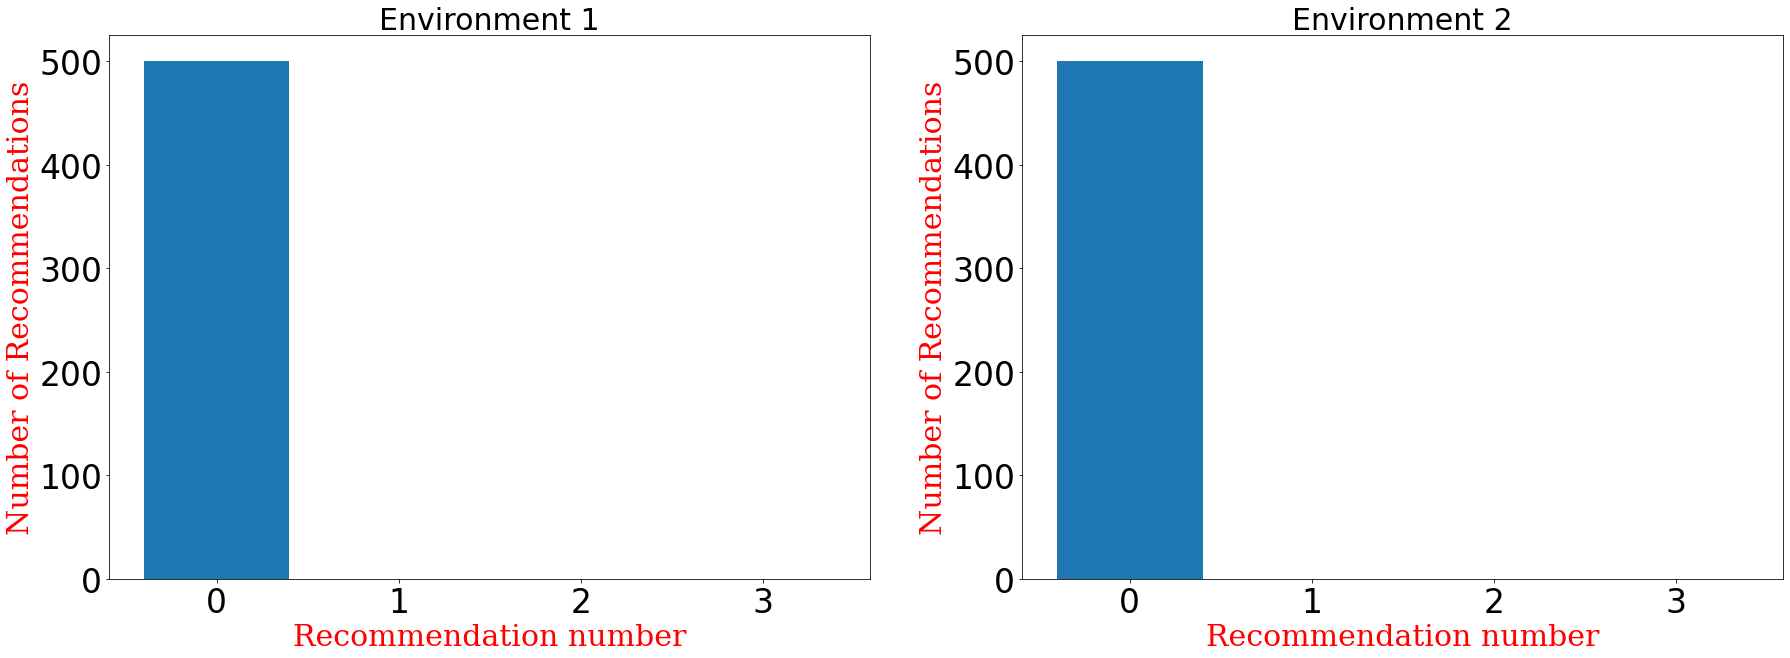

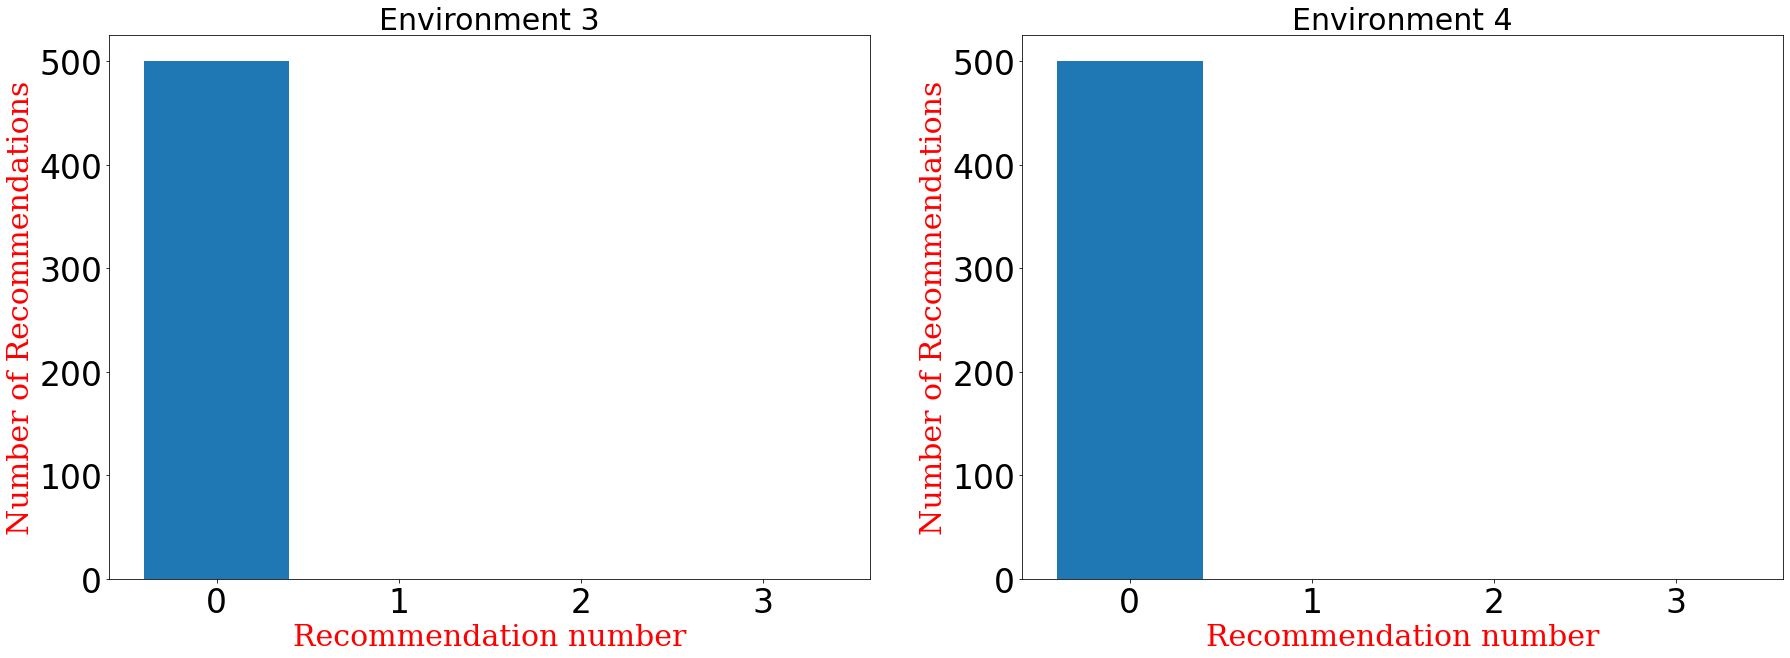

In [27]:
fig = plt.figure(figsize=[30,10])

ax1 = fig.add_subplot(121)
plt.xlabel("Recommendation number", {'family':'serif','color':'red','size':30})
plt.ylabel("Number of Recommendations", {'family':'serif','color':'red','size':30})
ax1.set_title('Environment 1', fontsize=30)

ax2 = fig.add_subplot(122)
plt.xlabel("Recommendation number", {'family':'serif','color':'red','size':30})
plt.ylabel("Number of Recommendations", {'family':'serif','color':'red','size':30})
ax2.set_title('Environment 2', fontsize=30)

ax1.bar([i for i in range(len(Garm_counts1))], Garm_counts1)
ax2.bar([i for i in range(len(Garm_counts2))], Garm_counts2)

fig = plt.figure(figsize=[30,10])
ax3 = fig.add_subplot(121)
plt.xlabel("Recommendation number", {'family':'serif','color':'red','size':30})
plt.ylabel("Number of Recommendations", {'family':'serif','color':'red','size':30})
ax3.set_title('Environment 3', fontsize=30)

ax4 = fig.add_subplot(122)
plt.xlabel("Recommendation number", {'family':'serif','color':'red','size':30})
plt.ylabel("Number of Recommendations", {'family':'serif','color':'red','size':30})
ax4.set_title('Environment 4', fontsize=30)

ax3.bar([i for i in range(len(Garm_counts3))], Garm_counts3)
ax4.bar([i for i in range(len(Garm_counts4))], Garm_counts4)

Text(0, 0.5, 'Cumulative reward')

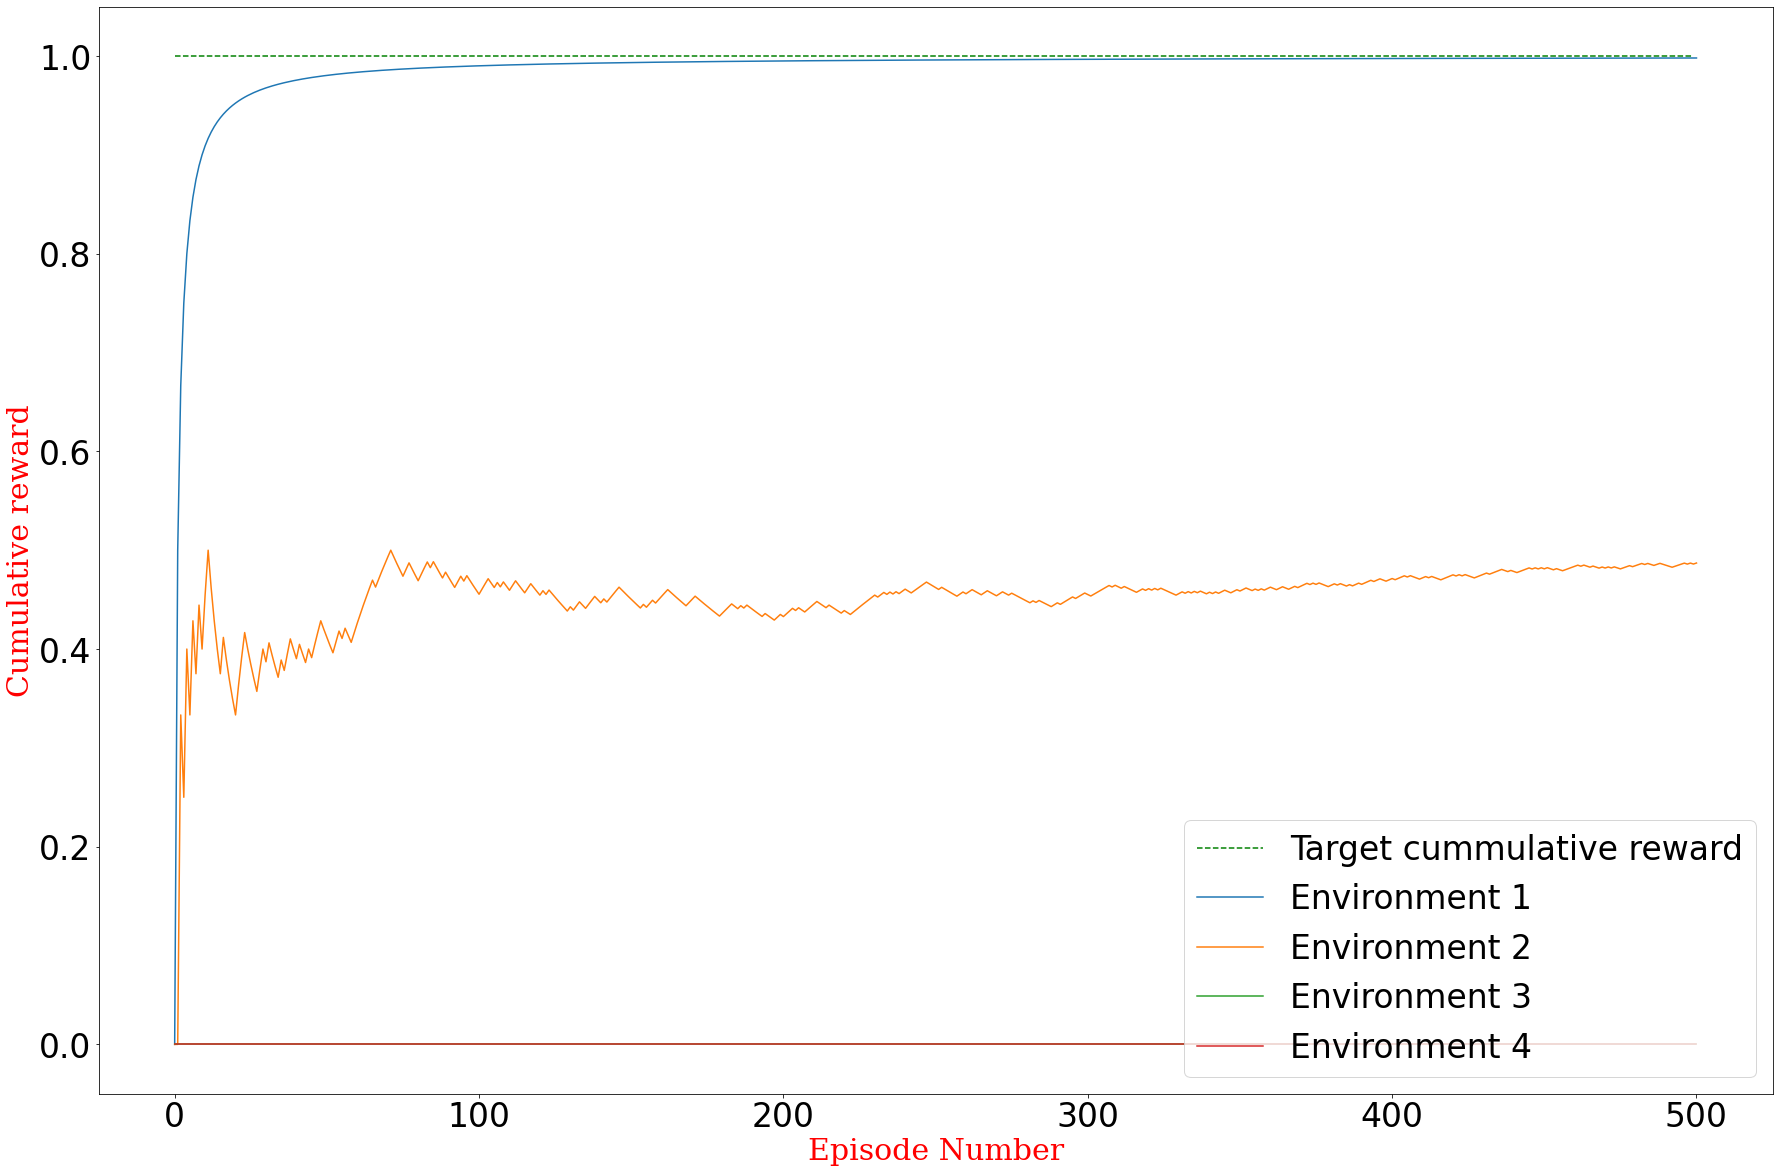

In [28]:
ax2 = plt.figure(figsize=[30,20])
plt.plot([1.0 for _ in range(random_agent1.episodes)], "g--", label="Target cummulative reward")

plt.rcParams['font.size'] = '33'

plt.plot(Gcum_rewards1, label="Environment 1")
plt.plot(Gcum_rewards2, label="Environment 2")
plt.plot(Gcum_rewards3, label="Environment 3")
plt.plot(Gcum_rewards4, label="Environment 4")

#plt.plot(ax2, label="sine")
#plt.plot(x, y2, "-r", label="cosine")
plt.legend(loc="lower right")
plt.xlabel("Episode Number", {'family':'serif','color':'red','size':30})
plt.ylabel("Cumulative reward", {'family':'serif','color':'red','size':30})

# A need for exploration and exploitation [22 - 27]

In [29]:
class EpsilonGreedyAgent(object):

  def __init__(self, env, max_episodes=500, epsilon=0.01, decay_rate=0.01, decay_interval=50):
    self.env = env
    self.episodes = max_episodes
    self.epsilon = epsilon
    self.decay_rate = decay_rate
    self.decay_interval = decay_interval

    self.q_values = np.zeros(self.env.k_arms)
    self.arm_counts = np.zeros(self.env.k_arms)
    self.arm_rewards = np.zeros(self.env.k_arms)

    self.rewards = [0.0]
    self.cum_rewards = [0.0]

  def act(self):
    for i in range(self.episodes):
      arm = np.random.choice(self.env.k_arms) if np.random.random() < self.epsilon else np.argmax(self.q_values)
      reward = self.env.choose_arm(arm)

      self.arm_counts[arm] = self.arm_counts[arm] + 1
      self.arm_rewards[arm] = self.arm_rewards[arm] + reward

      self.q_values[arm] = self.q_values[arm] + (1/self.arm_counts[arm]) * (reward - self.q_values[arm])
      self.rewards.append(reward)
      self.cum_rewards.append(sum(self.rewards) / len(self.rewards))

      if i % self.decay_interval == 0:
        self.epsilon = self.epsilon * self.decay_rate

    return {"arm_counts": self.arm_counts, "rewards": self.rewards, "cum_rewards": self.cum_rewards}


In [30]:
eGreedyAgent_1 = EpsilonGreedyAgent(env1, epsilon=0.1, decay_rate=1.0, decay_interval=50)
egreedy_agent_result1 = eGreedyAgent_1.act()
total_rewards = sum(egreedy_agent_result1["rewards"])
print(f"Total Reward : {total_rewards}")

Total Reward : 500.0


In [31]:
eGreedyAgent_2 = EpsilonGreedyAgent(env2, epsilon=0.1, decay_rate=1.0, decay_interval=50)
egreedy_agent_result2 = eGreedyAgent_2.act()
total_rewards = sum(egreedy_agent_result2["rewards"])
print(f"Total Reward : {total_rewards}")

Total Reward : 480.0


In [32]:
eGreedyAgent_3 = EpsilonGreedyAgent(env3, epsilon=0.1, decay_rate=1.0, decay_interval=50)
egreedy_agent_result3 = eGreedyAgent_3.act()
total_rewards = sum(egreedy_agent_result3["rewards"])
print(f"Total Reward : {total_rewards}")

Total Reward : 433.0


In [33]:
eGreedyAgent_4 = EpsilonGreedyAgent(env4, epsilon=0.1, decay_rate=1.0, decay_interval=50)
egreedy_agent_result4 = eGreedyAgent_4.act()
total_rewards = sum(egreedy_agent_result4["rewards"])
print(f"Total Reward : {total_rewards}")

Total Reward : 193.0


In [34]:
eGcum_rewards1 = egreedy_agent_result1["cum_rewards"]
eGarm_counts1 = egreedy_agent_result1["arm_counts"]
eGcum_rewards2 = egreedy_agent_result2["cum_rewards"]
eGarm_counts2 = egreedy_agent_result2["arm_counts"]
eGcum_rewards3 = egreedy_agent_result3["cum_rewards"]
eGarm_counts3 = egreedy_agent_result3["arm_counts"]
eGcum_rewards4 = egreedy_agent_result4["cum_rewards"]
eGarm_counts4 = egreedy_agent_result4["arm_counts"]

<BarContainer object of 4 artists>

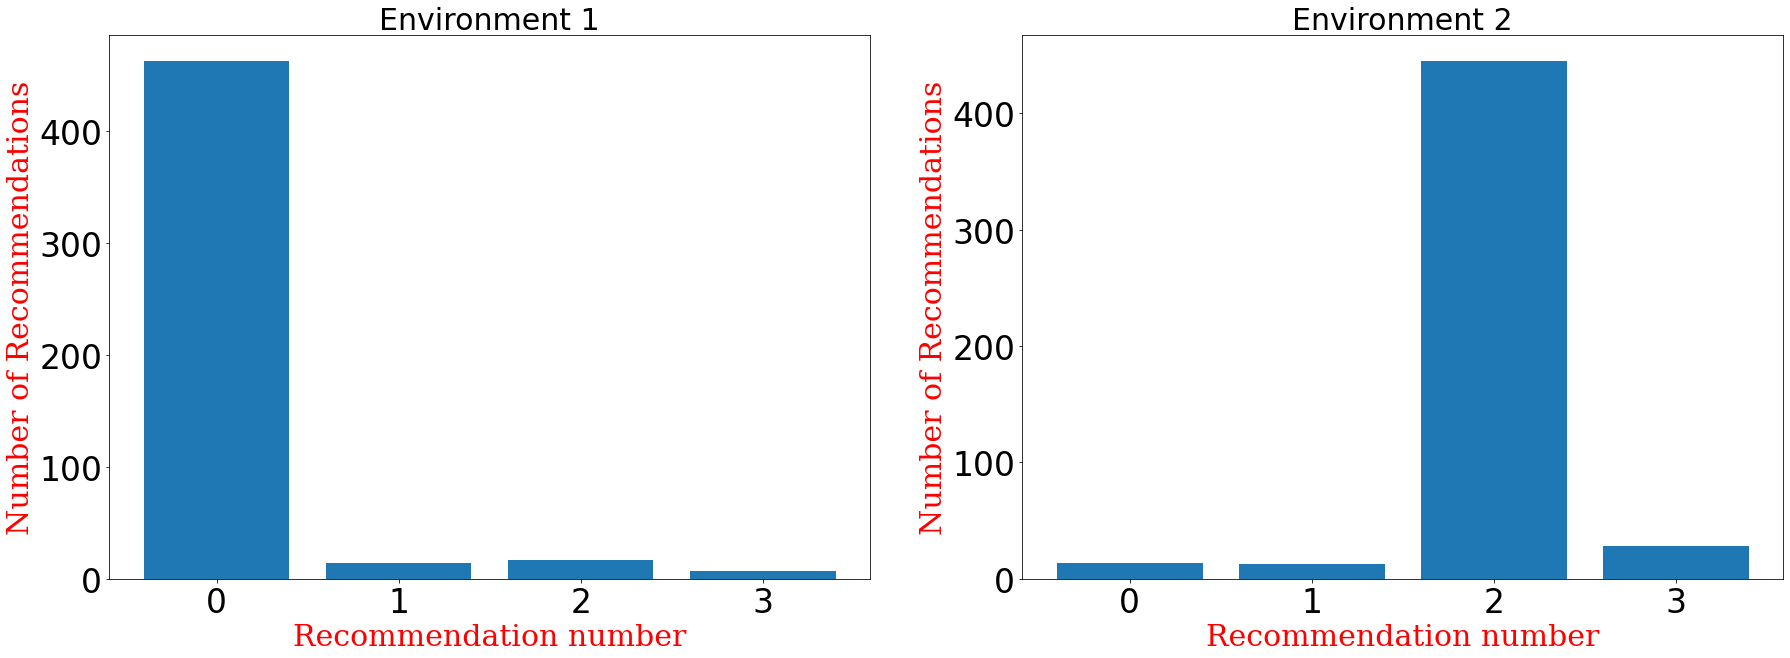

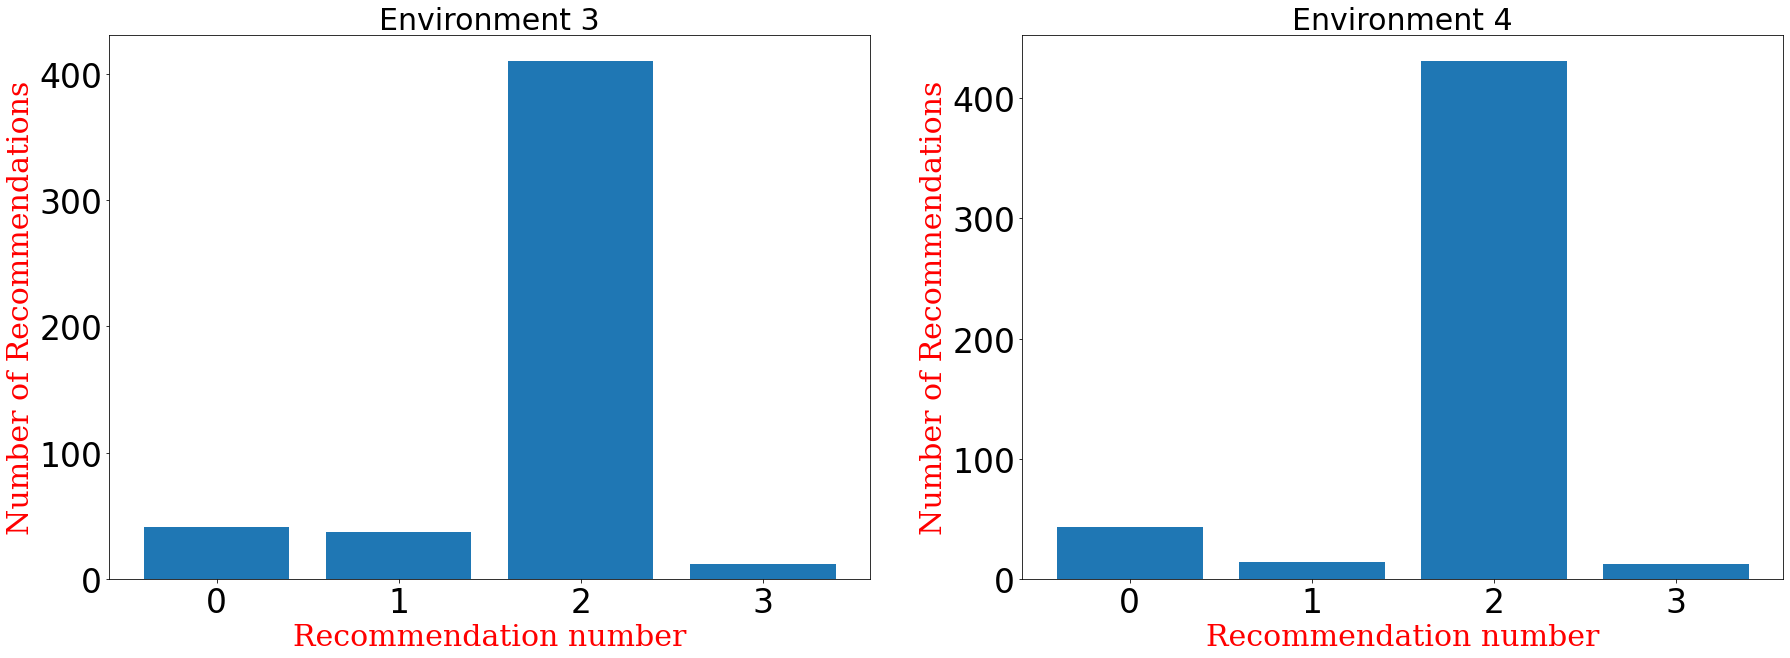

In [35]:
fig = plt.figure(figsize=[30,10])

ax1 = fig.add_subplot(121)
plt.xlabel("Recommendation number", {'family':'serif','color':'red','size':30})
plt.ylabel("Number of Recommendations", {'family':'serif','color':'red','size':30})
ax1.set_title('Environment 1', fontsize=30)

ax2 = fig.add_subplot(122)
plt.xlabel("Recommendation number", {'family':'serif','color':'red','size':30})
plt.ylabel("Number of Recommendations", {'family':'serif','color':'red','size':30})
ax2.set_title('Environment 2', fontsize=30)

ax1.bar([i for i in range(len(eGarm_counts1))], eGarm_counts1)
ax2.bar([i for i in range(len(eGarm_counts2))], eGarm_counts2)

fig = plt.figure(figsize=[30,10])
ax3 = fig.add_subplot(121)
plt.xlabel("Recommendation number", {'family':'serif','color':'red','size':30})
plt.ylabel("Number of Recommendations", {'family':'serif','color':'red','size':30})
ax3.set_title('Environment 3', fontsize=30)

ax4 = fig.add_subplot(122)
plt.xlabel("Recommendation number", {'family':'serif','color':'red','size':30})
plt.ylabel("Number of Recommendations", {'family':'serif','color':'red','size':30})
ax4.set_title('Environment 4', fontsize=30)

ax3.bar([i for i in range(len(eGarm_counts3))], eGarm_counts3)
ax4.bar([i for i in range(len(eGarm_counts4))], eGarm_counts4)

Text(0, 0.5, 'Cumulative reward')

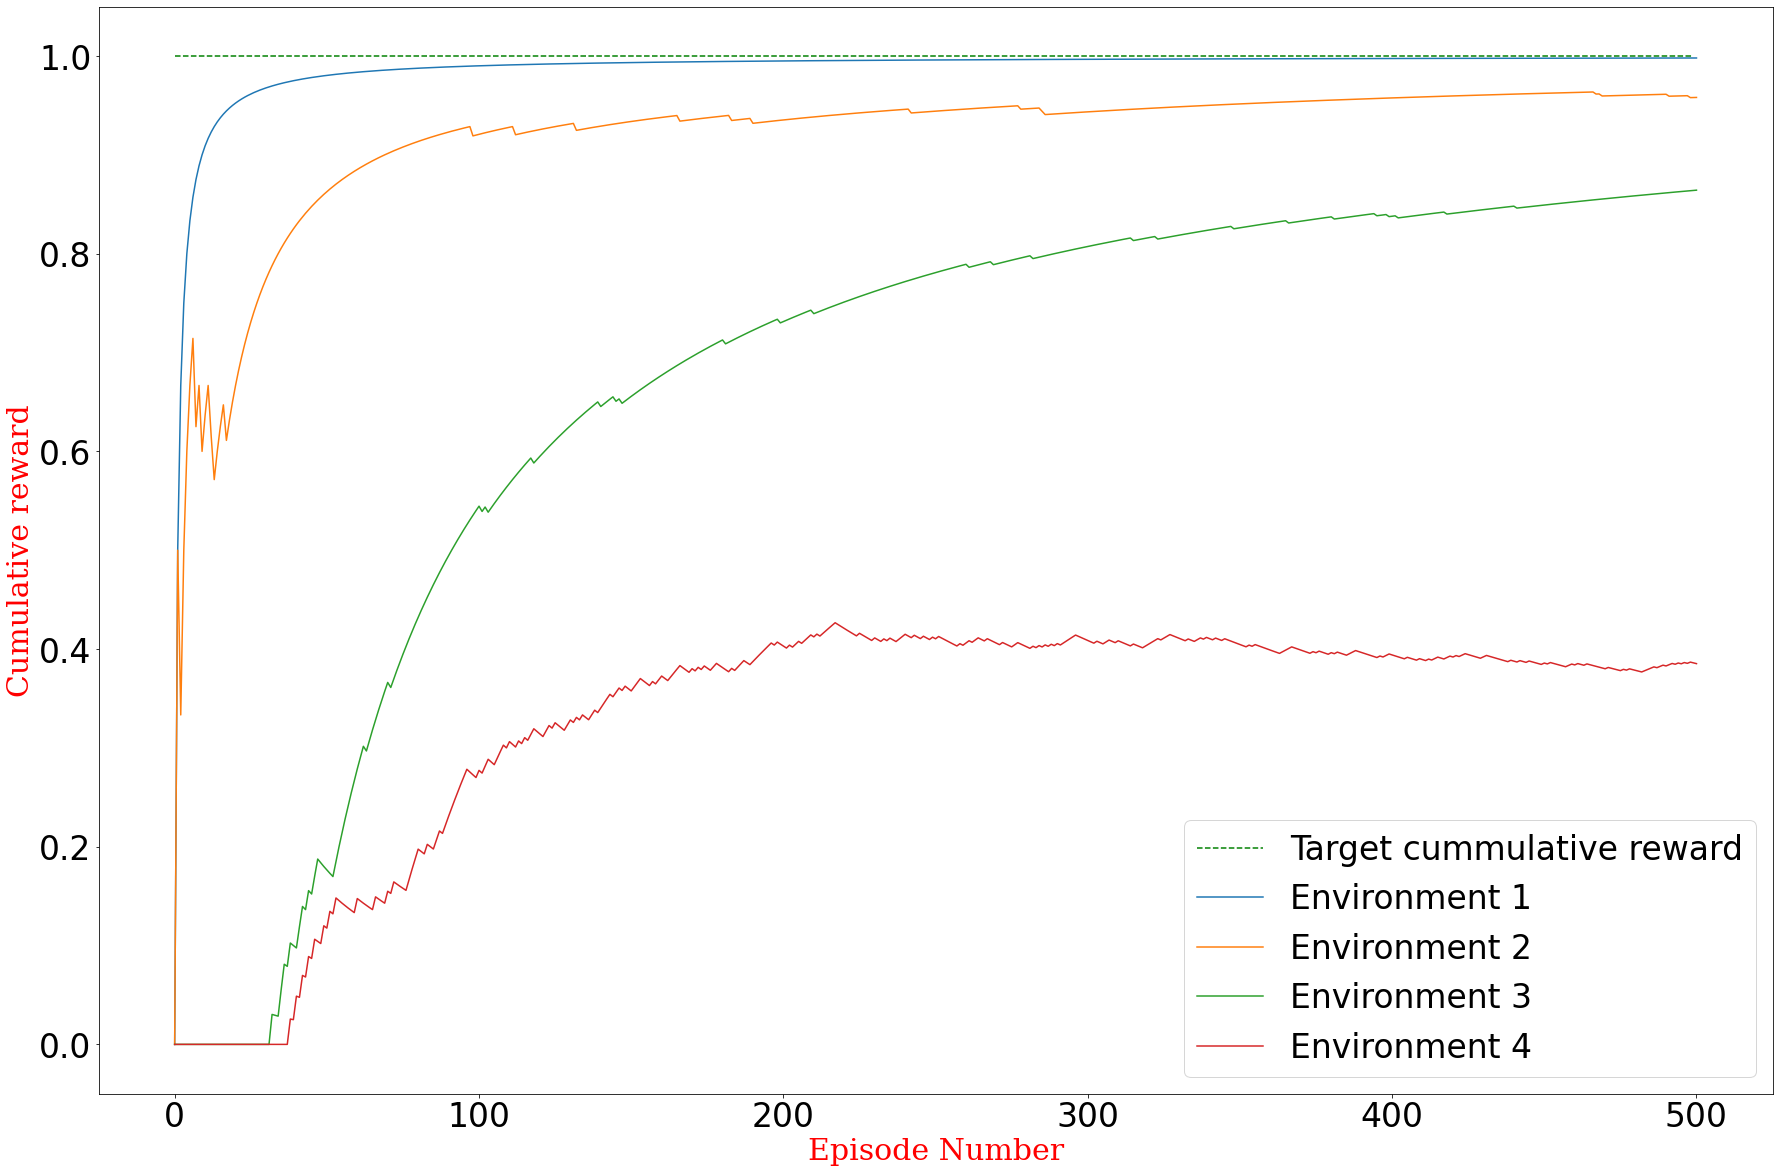

In [36]:
ax2 = plt.figure(figsize=[30,20])
plt.plot([1.0 for _ in range(random_agent1.episodes)], "g--", label="Target cummulative reward")

plt.rcParams['font.size'] = '33'

plt.plot(eGcum_rewards1, label="Environment 1")
plt.plot(eGcum_rewards2, label="Environment 2")
plt.plot(eGcum_rewards3, label="Environment 3")
plt.plot(eGcum_rewards4, label="Environment 4")

#plt.plot(ax2, label="sine")
#plt.plot(x, y2, "-r", label="cosine")
plt.legend(loc="lower right")
plt.xlabel("Episode Number", {'family':'serif','color':'red','size':30})
plt.ylabel("Cumulative reward", {'family':'serif','color':'red','size':30})

# Exploration with Softmax [22; 23; 25; 27; 28; 30]



In [37]:
class SoftmaxExplorationAgent(object):

  def __init__(self, env, max_episodes=500, tau=0.5):
    self.env = env
    self.episodes = max_episodes
    self.tau = tau

    self.action_probas = np.zeros(self.env.k_arms)
    self.q_values = np.zeros(self.env.k_arms)
    self.arm_counts = np.zeros(self.env.k_arms)
    self.arm_rewards = np.zeros(self.env.k_arms)

    self.rewards = [0.0]
    self.cum_rewards = [0.0]

  def act(self):
    for i in range(self.episodes):
      self.action_probas = np.exp(self.q_values/self.tau) / np.sum(np.exp(self.q_values/self.tau))
      arm = np.random.choice(self.env.k_arms, p=self.action_probas)
      reward = self.env.choose_arm(arm)

      self.arm_counts[arm] = self.arm_counts[arm] + 1
      self.arm_rewards[arm] = self.arm_rewards[arm] + reward

      self.q_values[arm] = self.q_values[arm] + (1/self.arm_counts[arm]) * (reward - self.q_values[arm])
      self.rewards.append(reward)
      self.cum_rewards.append(sum(self.rewards) / len(self.rewards))

    return {"arm_counts": self.arm_counts, "rewards": self.rewards, "cum_rewards": self.cum_rewards}

In [38]:
softmax_agent1 = SoftmaxExplorationAgent(env1, tau=0.015, max_episodes=500)
softmax_agent_result1 = softmax_agent1.act()
total_rewards1 = sum(softmax_agent_result1["rewards"])
print(f"Total Reward : {total_rewards1}")

Total Reward : 500.0


In [39]:
softmax_agent2 = SoftmaxExplorationAgent(env2, tau=0.015, max_episodes=500)
softmax_agent_result2 = softmax_agent2.act()
total_rewards2 = sum(softmax_agent_result2["rewards"])
print(f"Total Reward : {total_rewards2}")

Total Reward : 259.0


In [40]:
softmax_agent3 = SoftmaxExplorationAgent(env3, tau=0.015, max_episodes=500)
softmax_agent_result3 = softmax_agent3.act()
total_rewards3 = sum(softmax_agent_result3["rewards"])
print(f"Total Reward : {total_rewards3}")

Total Reward : 497.0


In [41]:
softmax_agent4 = SoftmaxExplorationAgent(env4, tau=0.015, max_episodes=500)
softmax_agent_result4 = softmax_agent4.act()
total_rewards4 = sum(softmax_agent_result4["rewards"])
print(f"Total Reward : {total_rewards4}")

Total Reward : 253.0


In [42]:
smxcum_rewards1 = softmax_agent_result1["cum_rewards"]
smxarm_counts1 = softmax_agent_result1["arm_counts"]
smxcum_rewards2 = softmax_agent_result2["cum_rewards"]
smxarm_counts2 = softmax_agent_result2["arm_counts"]
smxcum_rewards3 = softmax_agent_result3["cum_rewards"]
smxarm_counts3 = softmax_agent_result3["arm_counts"]
smxcum_rewards4 = softmax_agent_result4["cum_rewards"]
smxarm_counts4 = softmax_agent_result4["arm_counts"]

<BarContainer object of 4 artists>

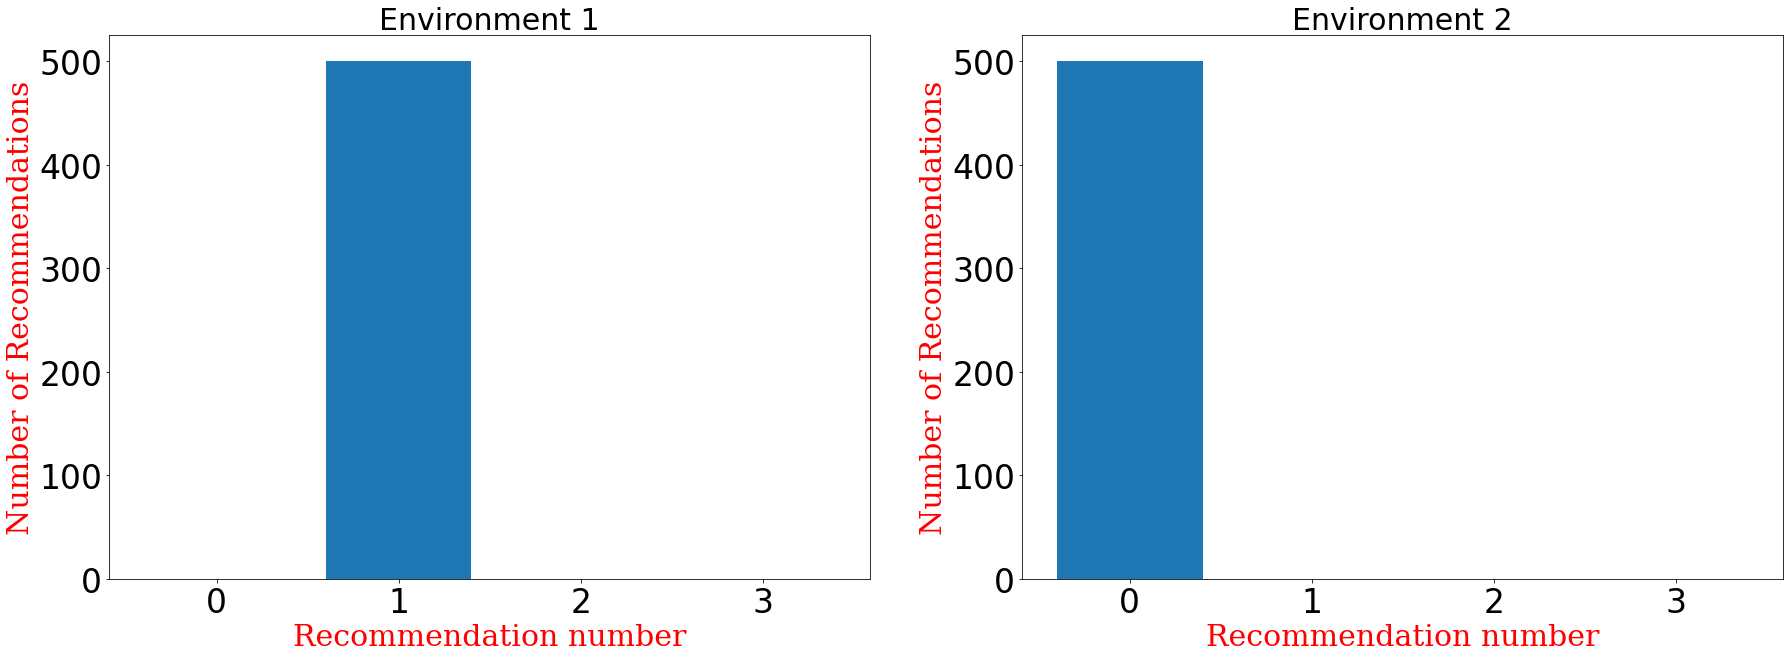

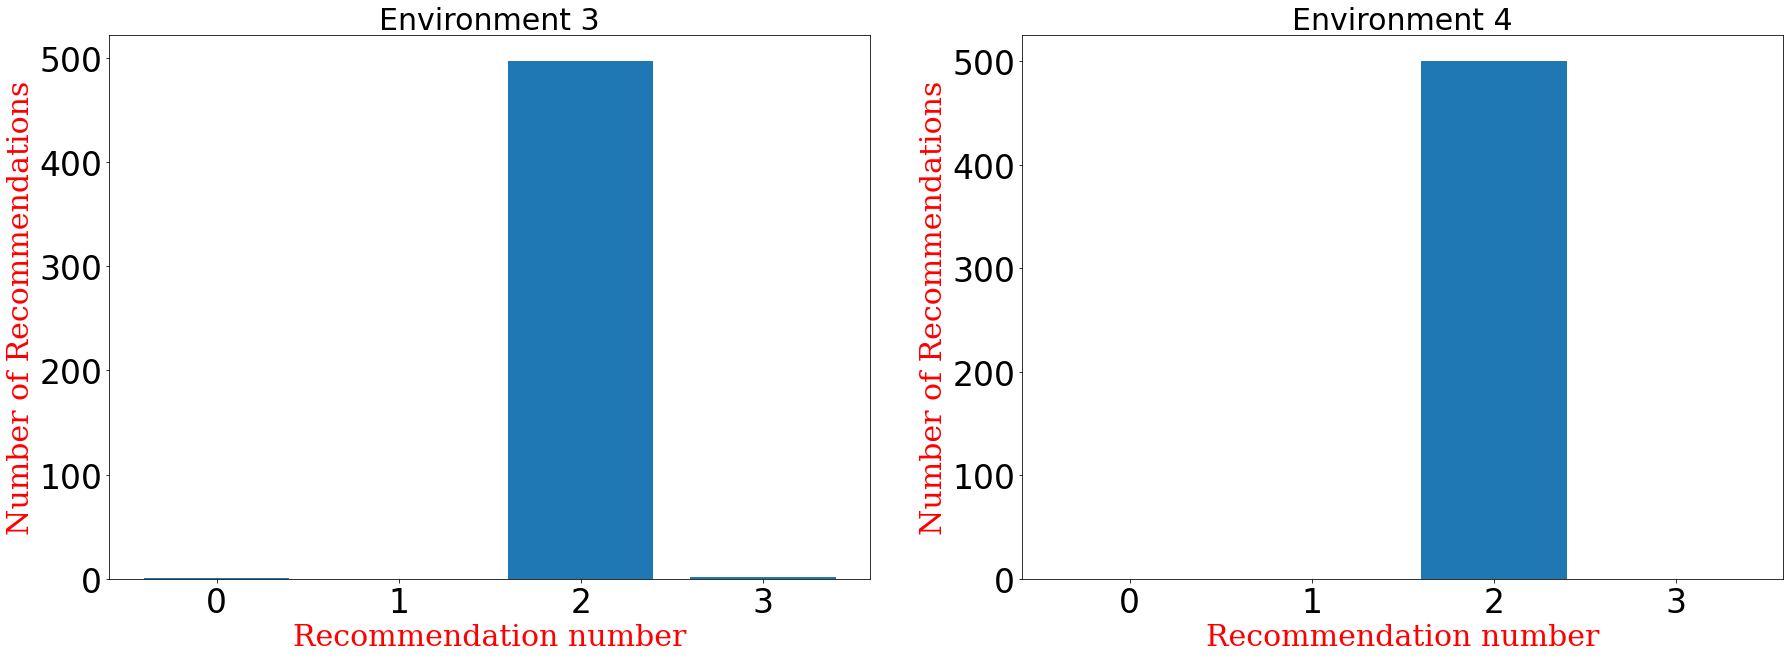

In [43]:
fig = plt.figure(figsize=[30,10])

ax1 = fig.add_subplot(121)
plt.xlabel("Recommendation number", {'family':'serif','color':'red','size':30})
plt.ylabel("Number of Recommendations", {'family':'serif','color':'red','size':30})
ax1.set_title('Environment 1', fontsize=30)

ax2 = fig.add_subplot(122)
plt.xlabel("Recommendation number", {'family':'serif','color':'red','size':30})
plt.ylabel("Number of Recommendations", {'family':'serif','color':'red','size':30})
ax2.set_title('Environment 2', fontsize=30)

ax1.bar([i for i in range(len(smxarm_counts1))], smxarm_counts1)
ax2.bar([i for i in range(len(smxarm_counts2))], smxarm_counts2)

fig = plt.figure(figsize=[30,10])
ax3 = fig.add_subplot(121)
plt.xlabel("Recommendation number", {'family':'serif','color':'red','size':30})
plt.ylabel("Number of Recommendations", {'family':'serif','color':'red','size':30})
ax3.set_title('Environment 3', fontsize=30)

ax4 = fig.add_subplot(122)
plt.xlabel("Recommendation number", {'family':'serif','color':'red','size':30})
plt.ylabel("Number of Recommendations", {'family':'serif','color':'red','size':30})
ax4.set_title('Environment 4', fontsize=30)

ax3.bar([i for i in range(len(smxarm_counts3))], smxarm_counts3)
ax4.bar([i for i in range(len(smxarm_counts4))], smxarm_counts4)

Text(0, 0.5, 'Cumulative reward')

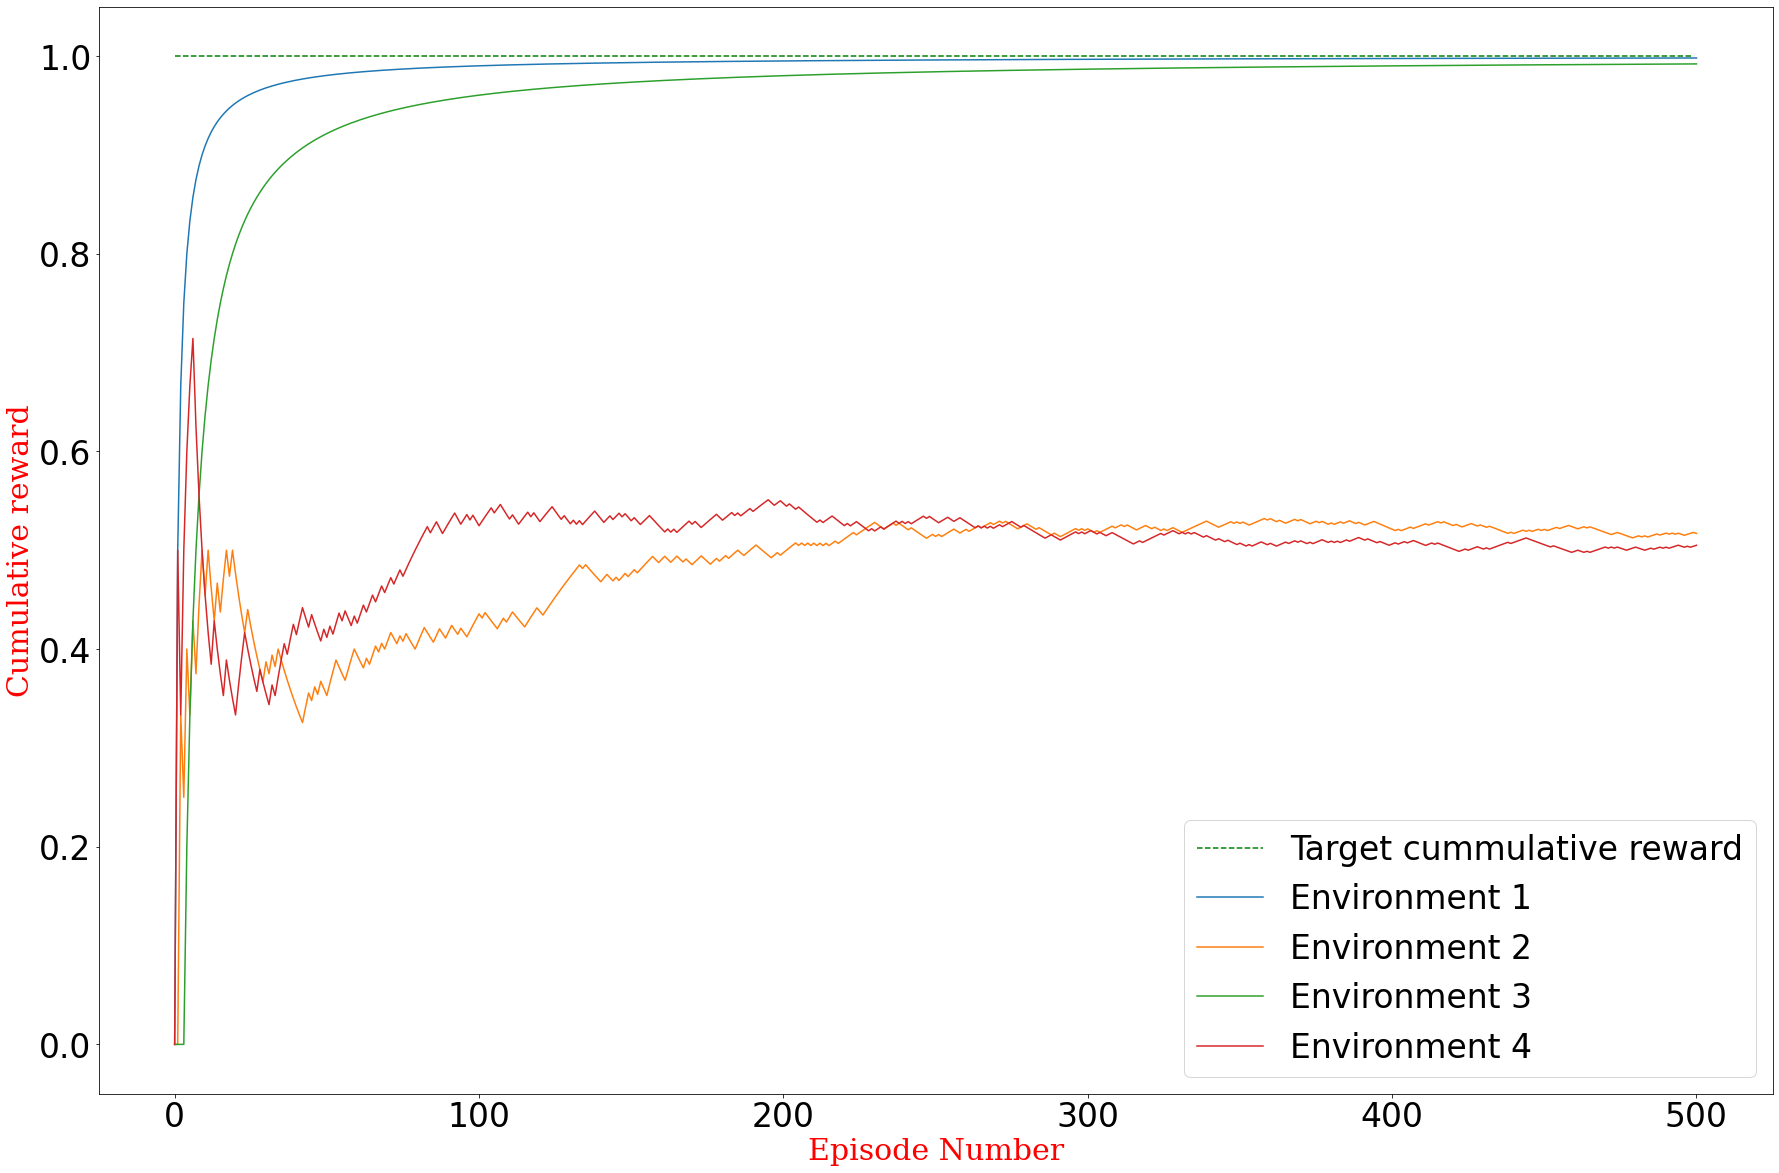

In [44]:
ax2 = plt.figure(figsize=[30,20])
plt.plot([1.0 for _ in range(random_agent1.episodes)], "g--", label="Target cummulative reward")

plt.rcParams['font.size'] = '33'

plt.plot(smxcum_rewards1, label="Environment 1")
plt.plot(smxcum_rewards2, label="Environment 2")
plt.plot(smxcum_rewards3, label="Environment 3")
plt.plot(smxcum_rewards4, label="Environment 4")

#plt.plot(ax2, label="sine")
#plt.plot(x, y2, "-r", label="cosine")
plt.legend(loc="lower right")
plt.xlabel("Episode Number", {'family':'serif','color':'red','size':30})
plt.ylabel("Cumulative reward", {'family':'serif','color':'red','size':30})

In [45]:
class OptimisticAgent(object):

  def __init__(self, env, initial_q=1.0, initial_visits=50, max_episodes=500):
    self.env = env
    self.episodes = max_episodes
    self.initial_q = initial_q
    self.initial_visits = initial_visits

    self.q_values = np.ones(self.env.k_arms) * self.initial_q
    self.arm_counts = np.ones(self.env.k_arms) * self.initial_visits
    self.arm_rewards = np.zeros(self.env.k_arms)

    self.rewards = [0.0]
    self.cum_rewards = [0.0]

  def act(self):
    for i in range(self.episodes):
      arm = np.argmax(self.q_values)
      reward = self.env.choose_arm(arm)

      self.arm_counts[arm] = self.arm_counts[arm] + 1
      self.arm_rewards[arm] = self.arm_rewards[arm] + reward

      self.q_values[arm] = self.q_values[arm] + (1/self.arm_counts[arm]) * (reward - self.q_values[arm])
      self.rewards.append(reward)
      self.cum_rewards.append(sum(self.rewards) / len(self.rewards))

    return {"arm_counts": self.arm_counts, "rewards": self.rewards, "cum_rewards": self.cum_rewards}


In [46]:
optimistic_agent1 = OptimisticAgent(env1)
optimistic_agent_result1 = optimistic_agent1.act()
opt_rewards1 = sum(optimistic_agent_result1["rewards"])
print(f"Total Reward : {opt_rewards1}")

Total Reward : 500.0


In [47]:
optimistic_agent2 = OptimisticAgent(env2)
optimistic_agent_result2 = optimistic_agent2.act()
opt_rewards2 = sum(optimistic_agent_result2["rewards"])
print(f"Total Reward : {opt_rewards2}")

Total Reward : 498.0


In [48]:
optimistic_agent3 = OptimisticAgent(env3)
optimistic_agent_result3 = optimistic_agent3.act()
opt_rewards3 = sum(optimistic_agent_result3["rewards"])
print(f"Total Reward : {opt_rewards3}")

Total Reward : 498.0


In [49]:
optimistic_agent4 = OptimisticAgent(env4)
optimistic_agent_result4 = optimistic_agent4.act()
opt_rewards4 = sum(optimistic_agent_result4["rewards"])
print(f"Total Reward : {opt_rewards4}")

Total Reward : 210.0


In [50]:
opcum_rewards1 = softmax_agent_result1["cum_rewards"]
oparm_counts1 = softmax_agent_result1["arm_counts"]
opcum_rewards2 = softmax_agent_result2["cum_rewards"]
oparm_counts2 = softmax_agent_result2["arm_counts"]
opcum_rewards3 = softmax_agent_result3["cum_rewards"]
oparm_counts3 = softmax_agent_result3["arm_counts"]
opcum_rewards4 = softmax_agent_result4["cum_rewards"]
oparm_counts4 = softmax_agent_result4["arm_counts"]

<BarContainer object of 4 artists>

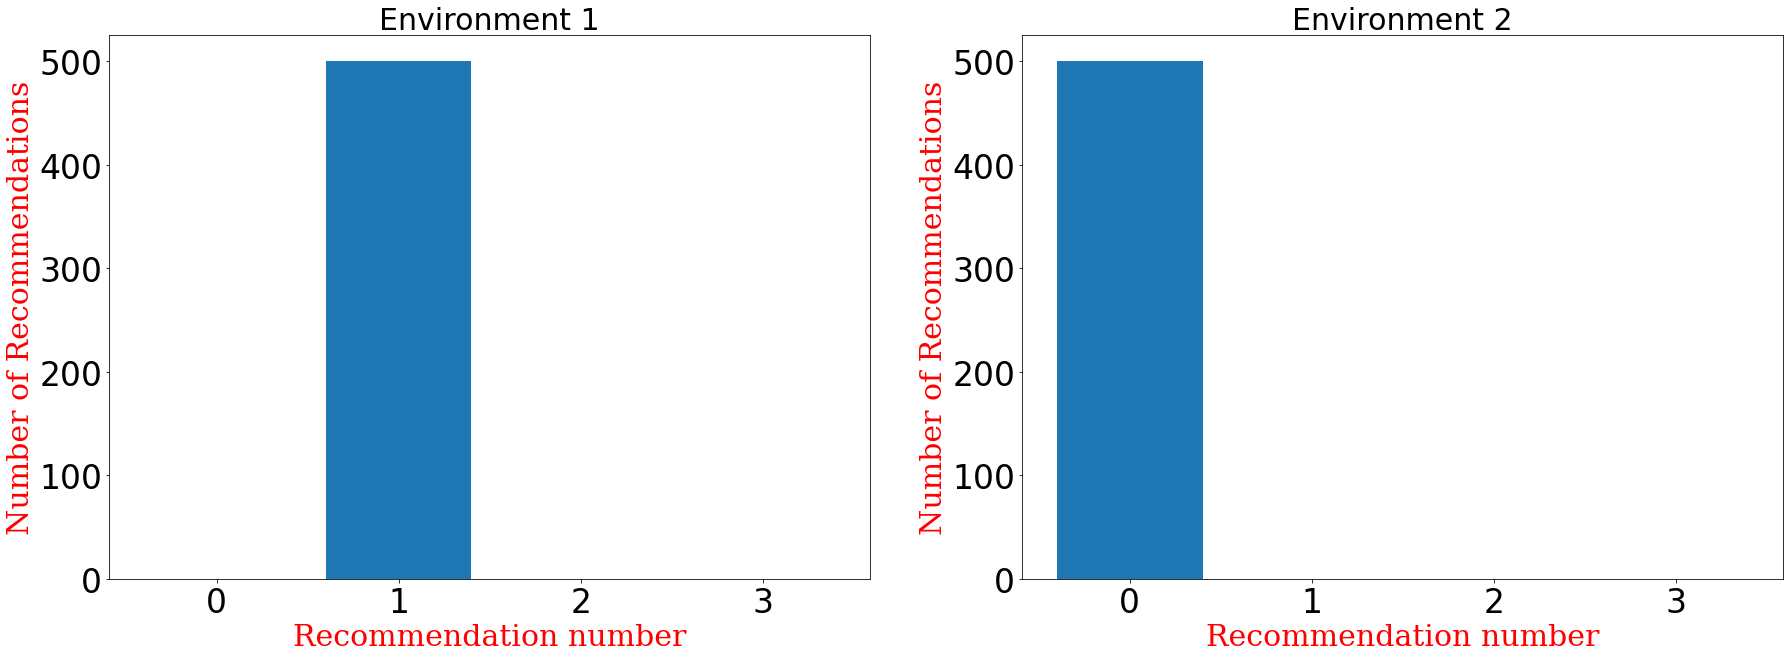

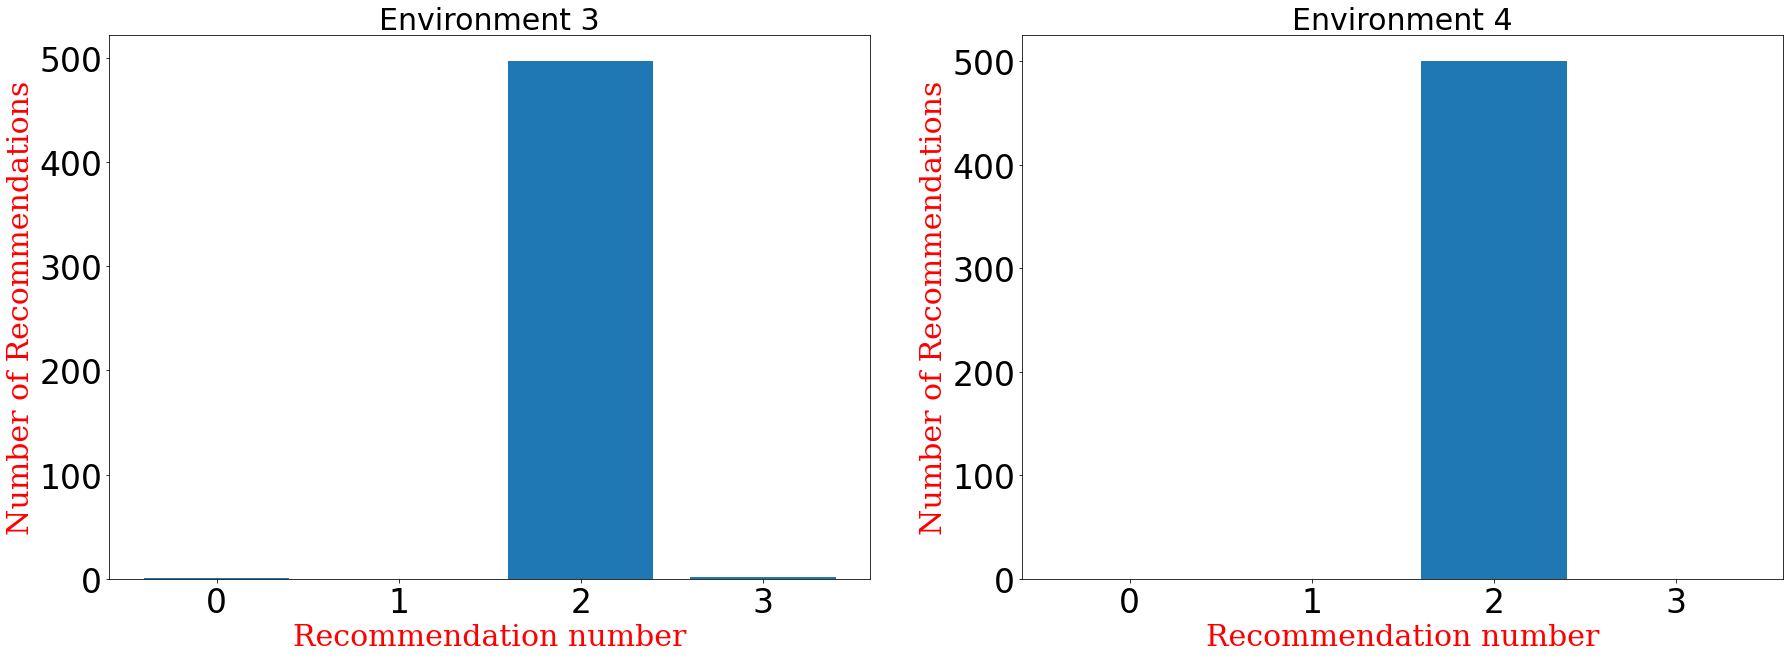

In [51]:
fig = plt.figure(figsize=[30,10])

ax1 = fig.add_subplot(121)
plt.xlabel("Recommendation number", {'family':'serif','color':'red','size':30})
plt.ylabel("Number of Recommendations", {'family':'serif','color':'red','size':30})
ax1.set_title('Environment 1', fontsize=30)

ax2 = fig.add_subplot(122)
plt.xlabel("Recommendation number", {'family':'serif','color':'red','size':30})
plt.ylabel("Number of Recommendations", {'family':'serif','color':'red','size':30})
ax2.set_title('Environment 2', fontsize=30)

ax1.bar([i for i in range(len(oparm_counts1))], oparm_counts1)
ax2.bar([i for i in range(len(oparm_counts2))], oparm_counts2)

fig = plt.figure(figsize=[30,10])
ax3 = fig.add_subplot(121)
plt.xlabel("Recommendation number", {'family':'serif','color':'red','size':30})
plt.ylabel("Number of Recommendations", {'family':'serif','color':'red','size':30})
ax3.set_title('Environment 3', fontsize=30)

ax4 = fig.add_subplot(122)
plt.xlabel("Recommendation number", {'family':'serif','color':'red','size':30})
plt.ylabel("Number of Recommendations", {'family':'serif','color':'red','size':30})
ax4.set_title('Environment 4', fontsize=30)

ax3.bar([i for i in range(len(oparm_counts3))], oparm_counts3)
ax4.bar([i for i in range(len(oparm_counts4))], oparm_counts4)

Text(0, 0.5, 'Cumulative reward')

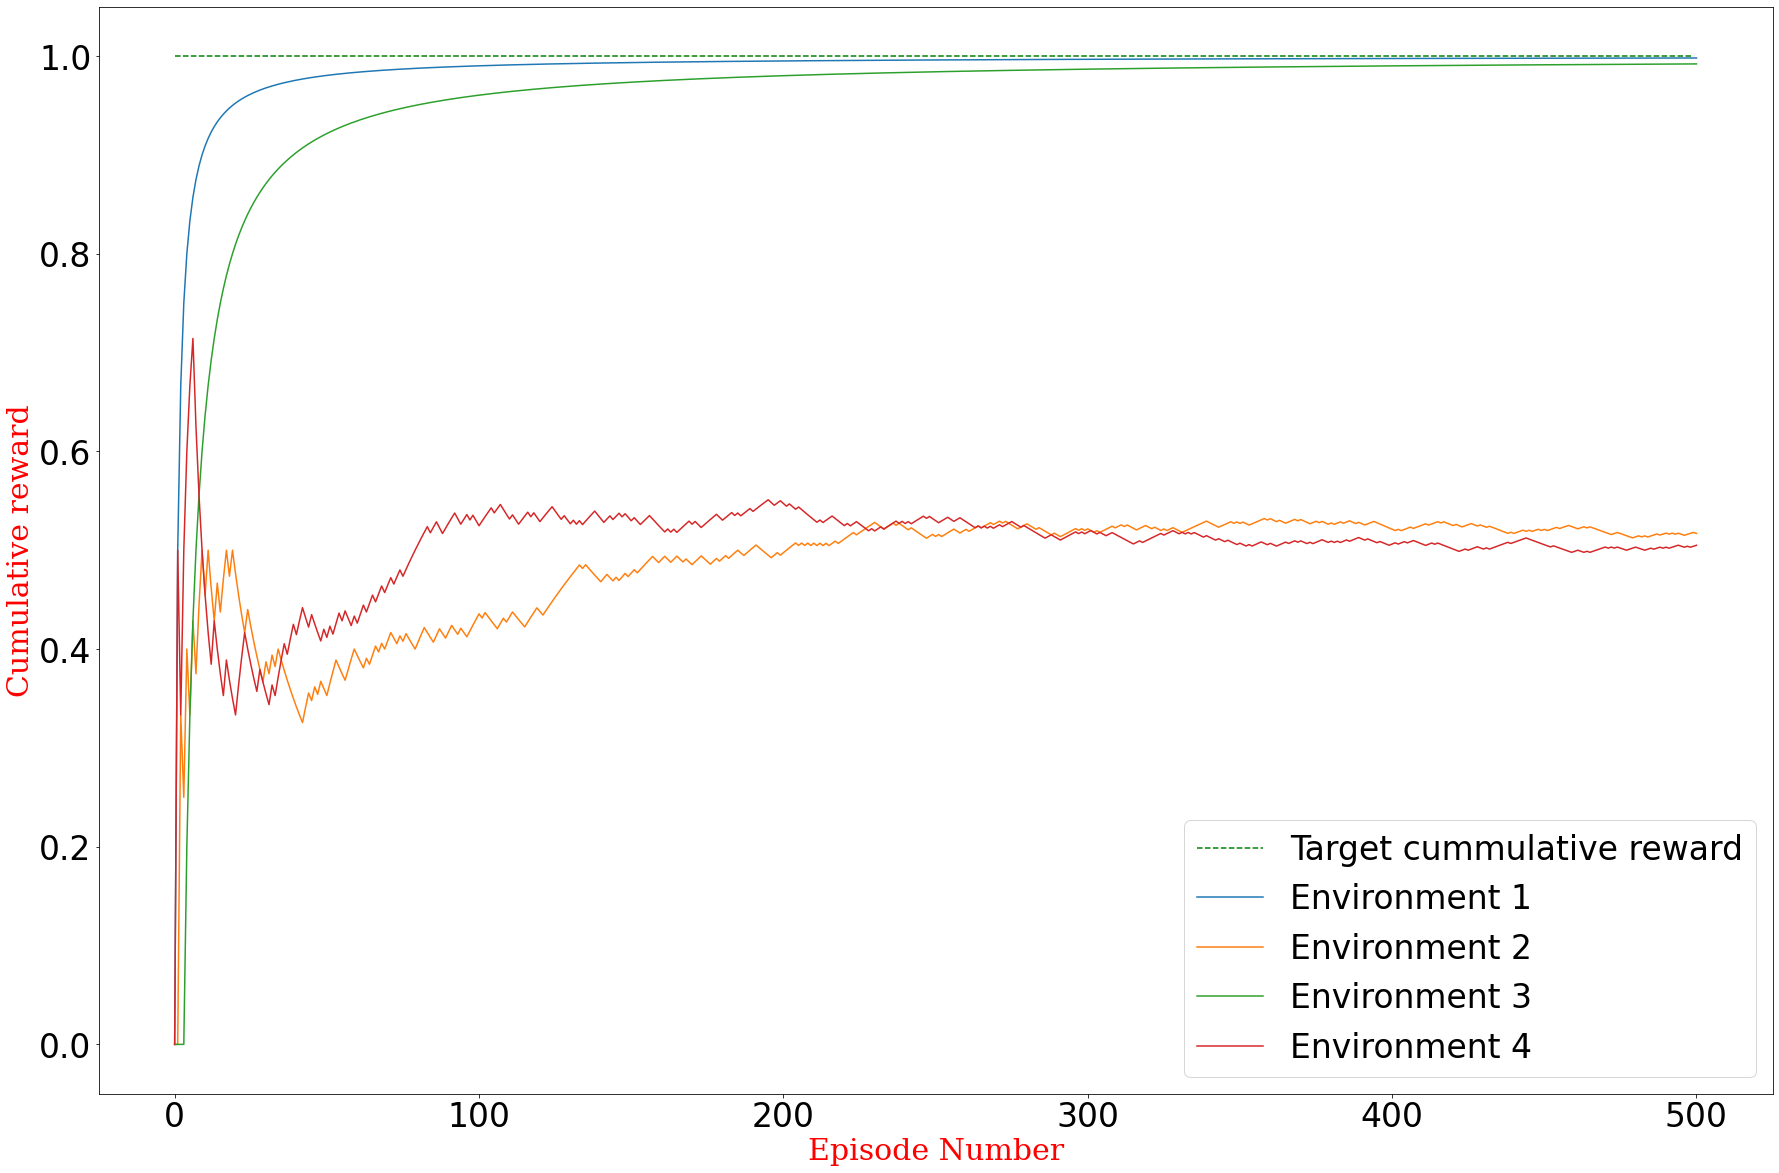

In [52]:
ax2 = plt.figure(figsize=[30,20])
plt.plot([1.0 for _ in range(random_agent1.episodes)], "g--", label="Target cummulative reward")

plt.rcParams['font.size'] = '33'

plt.plot(opcum_rewards1, label="Environment 1")
plt.plot(opcum_rewards2, label="Environment 2")
plt.plot(opcum_rewards3, label="Environment 3")
plt.plot(opcum_rewards4, label="Environment 4")

#plt.plot(ax2, label="sine")
#plt.plot(x, y2, "-r", label="cosine")
plt.legend(loc="lower right")
plt.xlabel("Episode Number", {'family':'serif','color':'red','size':30})
plt.ylabel("Cumulative reward", {'family':'serif','color':'red','size':30})

# Upper confidence bound

In [53]:
class UCBAgent(object):

  def __init__(self, env, c=2, max_episodes=500):
    self.env = env
    self.c = c
    self.episodes = max_episodes

    self.q_values = np.zeros(self.env.k_arms, dtype=np.float32)
    self.arm_counts = np.zeros(self.env.k_arms, dtype=np.int)
    self.arm_rewards = np.zeros(self.env.k_arms, dtype=np.float32)

    self.rewards = [0.0]
    self.cum_rewards = [0.0]

  def act(self):
    for i in range(0, self.episodes):
      if i < len(self.q_values):
        arm = i
      else:
        U = self.c * np.sqrt(np.log(i) / self.arm_counts)
        arm = np.argmax(self.q_values + U)

      reward = self.env.choose_arm(arm)

      self.arm_rewards[arm] += reward
      self.arm_counts[arm] += 1
      self.q_values[arm] = self.q_values[arm] + (1/self.arm_counts[arm]) * (reward - self.q_values[arm])

      self.rewards.append(reward)
      self.cum_rewards.append(sum(self.rewards)/len(self.rewards))

    return {"arm_counts" : self.arm_counts, "rewards": self.rewards, "cum_rewards": self.cum_rewards}
        

In [54]:
ucb_agent1 = UCBAgent(env1, c=1)
ucb_agent_result1 = ucb_agent1.act()
ucb_rewards1 = sum(ucb_agent_result1["rewards"])
print(f"Total Reward : {ucb_rewards1}")

Total Reward : 500.0


In [55]:
ucb_agent2 = UCBAgent(env2, c=1)
ucb_agent_result2 = ucb_agent2.act()
ucb_rewards2 = sum(ucb_agent_result2["rewards"])
print(f"Total Reward : {ucb_rewards2}")

Total Reward : 469.0


In [56]:
ucb_agent3 = UCBAgent(env3, c=1)
ucb_agent_result3 = ucb_agent3.act()
ucb_rewards3 = sum(ucb_agent_result3["rewards"])
print(f"Total Reward : {ucb_rewards3}")

Total Reward : 482.0


In [57]:
ucb_agent4 = UCBAgent(env4, c=1)
ucb_agent_result4 = ucb_agent4.act()
ucb_rewards4 = sum(ucb_agent_result4["rewards"])
print(f"Total Reward : {ucb_rewards4}")

Total Reward : 222.0


In [58]:
ucb_rewards1 = ucb_agent_result1["cum_rewards"]
ucb_counts1 = ucb_agent_result1["arm_counts"]
ucb_rewards2 = ucb_agent_result2["cum_rewards"]
ucb_counts2 = ucb_agent_result2["arm_counts"]
ucb_rewards3 = ucb_agent_result3["cum_rewards"]
ucb_counts3 = ucb_agent_result3["arm_counts"]
ucb_rewards4 = ucb_agent_result4["cum_rewards"]
ucb_counts4 = ucb_agent_result4["arm_counts"]

<BarContainer object of 4 artists>

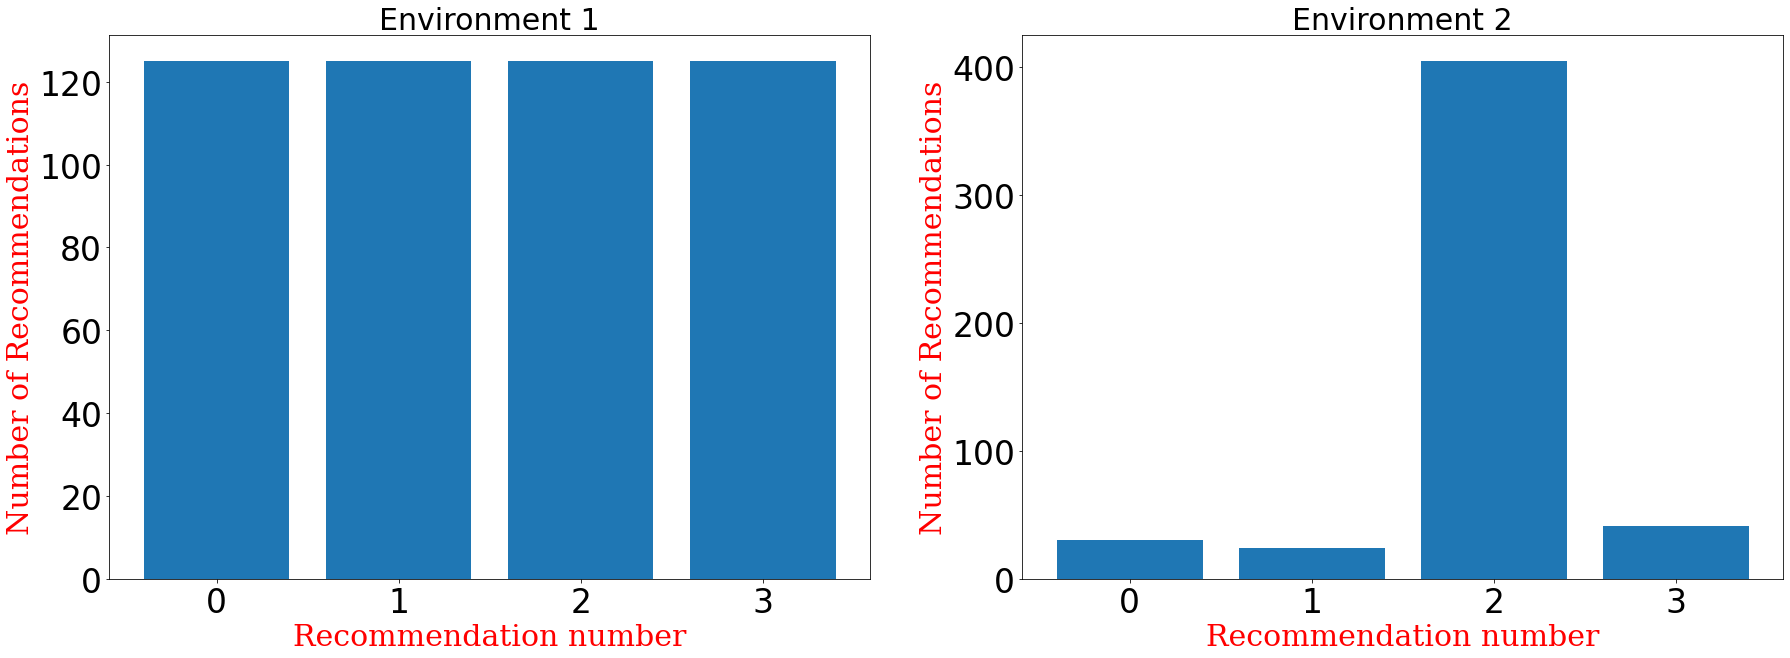

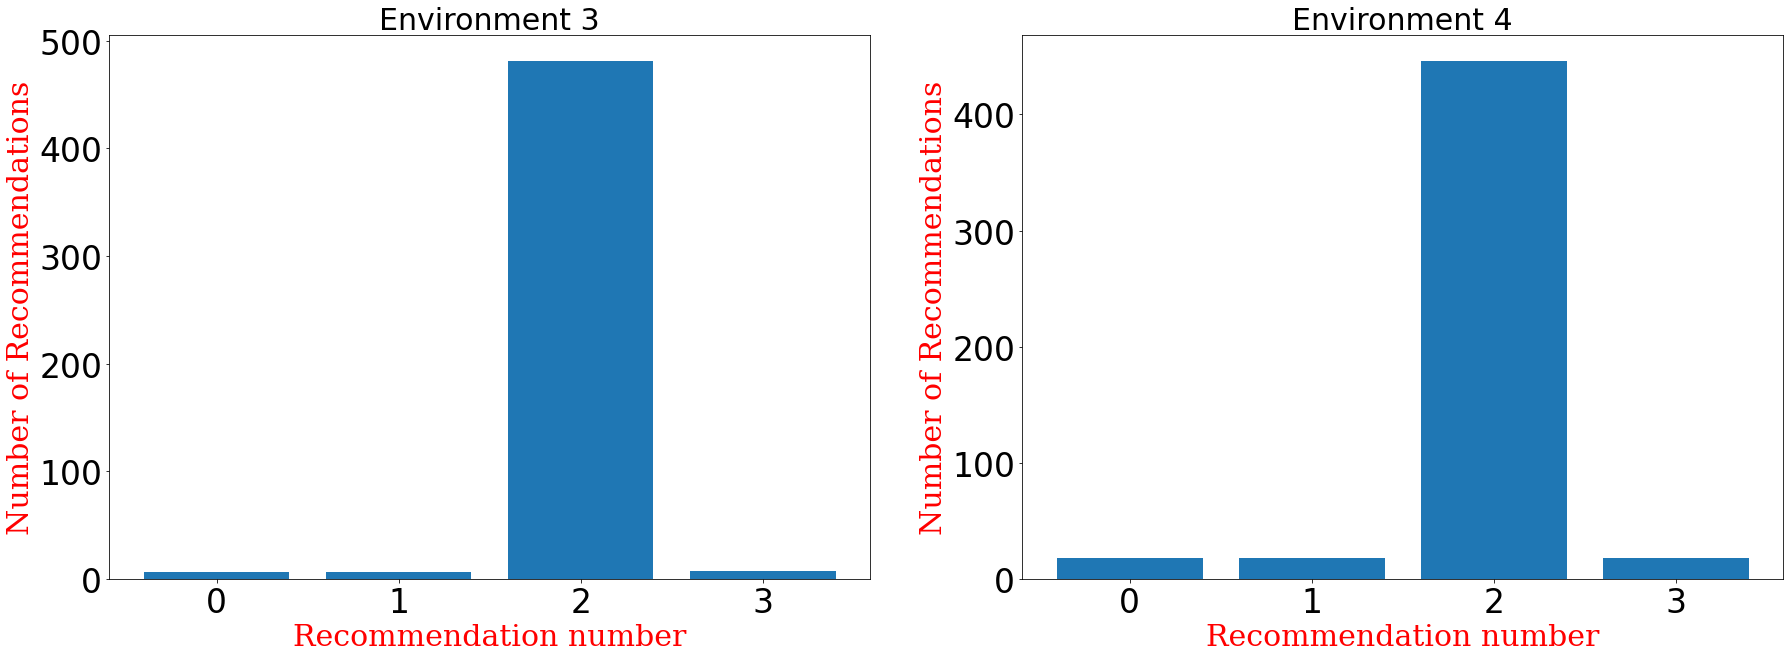

In [59]:
fig = plt.figure(figsize=[30,10])

ax1 = fig.add_subplot(121)
plt.xlabel("Recommendation number", {'family':'serif','color':'red','size':30})
plt.ylabel("Number of Recommendations", {'family':'serif','color':'red','size':30})
ax1.set_title('Environment 1', fontsize=30)

ax2 = fig.add_subplot(122)
plt.xlabel("Recommendation number", {'family':'serif','color':'red','size':30})
plt.ylabel("Number of Recommendations", {'family':'serif','color':'red','size':30})
ax2.set_title('Environment 2', fontsize=30)

ax1.bar([i for i in range(len(ucb_counts1))], ucb_counts1)
ax2.bar([i for i in range(len(ucb_counts2))], ucb_counts2)

fig = plt.figure(figsize=[30,10])
ax3 = fig.add_subplot(121)
plt.xlabel("Recommendation number", {'family':'serif','color':'red','size':30})
plt.ylabel("Number of Recommendations", {'family':'serif','color':'red','size':30})
ax3.set_title('Environment 3', fontsize=30)

ax4 = fig.add_subplot(122)
plt.xlabel("Recommendation number", {'family':'serif','color':'red','size':30})
plt.ylabel("Number of Recommendations", {'family':'serif','color':'red','size':30})
ax4.set_title('Environment 4', fontsize=30)

ax3.bar([i for i in range(len(ucb_counts3))], ucb_counts3)
ax4.bar([i for i in range(len(ucb_counts4))], ucb_counts4)

Text(0, 0.5, 'Cumulative reward')

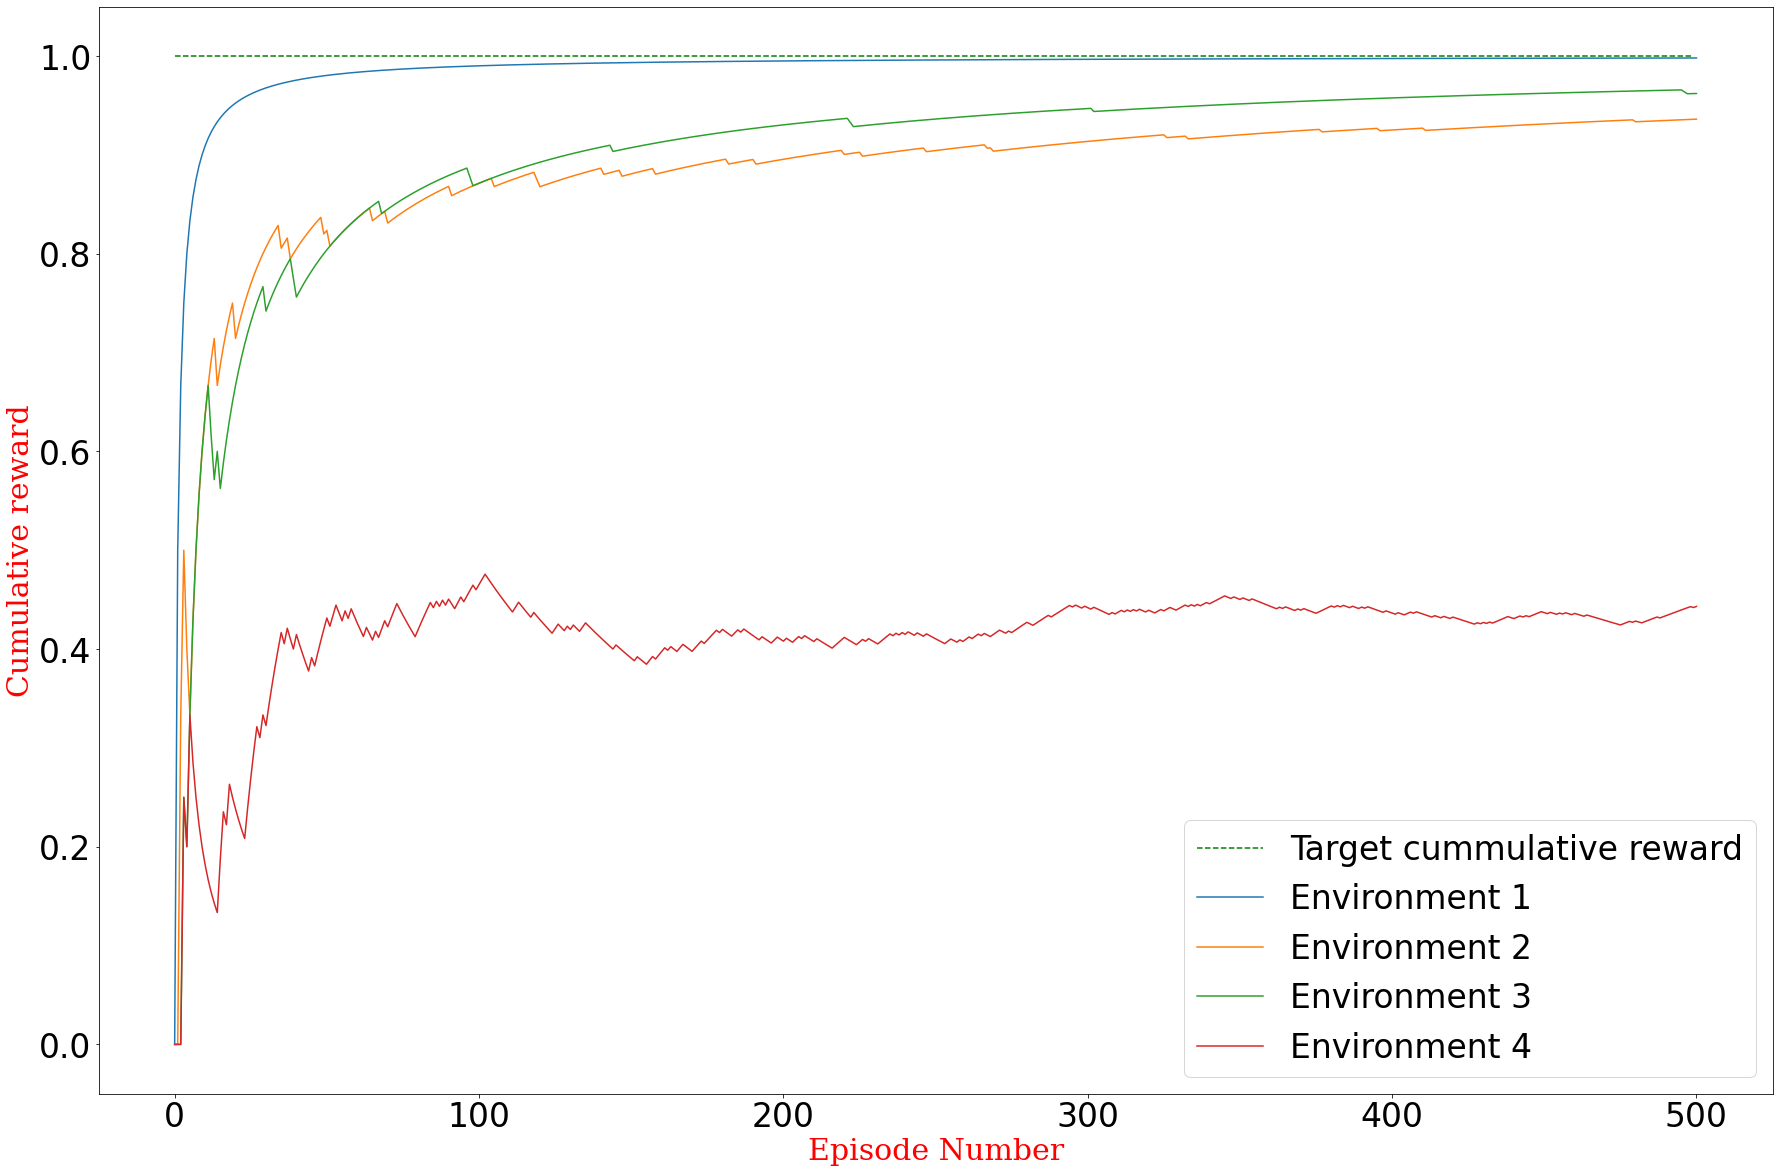

In [60]:
ax2 = plt.figure(figsize=[30,20])
plt.plot([1.0 for _ in range(random_agent1.episodes)], "g--", label="Target cummulative reward")

plt.rcParams['font.size'] = '33'

plt.plot(ucb_rewards1, label="Environment 1")
plt.plot(ucb_rewards2, label="Environment 2")
plt.plot(ucb_rewards3, label="Environment 3")
plt.plot(ucb_rewards4, label="Environment 4")

#plt.plot(ax2, label="sine")
#plt.plot(x, y2, "-r", label="cosine")
plt.legend(loc="lower right")
plt.xlabel("Episode Number", {'family':'serif','color':'red','size':30})
plt.ylabel("Cumulative reward", {'family':'serif','color':'red','size':30})

In [61]:
ucb_rewards1

[0.0,
 0.5,
 0.6666666666666666,
 0.75,
 0.8,
 0.8333333333333334,
 0.8571428571428571,
 0.875,
 0.8888888888888888,
 0.9,
 0.9090909090909091,
 0.9166666666666666,
 0.9230769230769231,
 0.9285714285714286,
 0.9333333333333333,
 0.9375,
 0.9411764705882353,
 0.9444444444444444,
 0.9473684210526315,
 0.95,
 0.9523809523809523,
 0.9545454545454546,
 0.9565217391304348,
 0.9583333333333334,
 0.96,
 0.9615384615384616,
 0.9629629629629629,
 0.9642857142857143,
 0.9655172413793104,
 0.9666666666666667,
 0.967741935483871,
 0.96875,
 0.9696969696969697,
 0.9705882352941176,
 0.9714285714285714,
 0.9722222222222222,
 0.972972972972973,
 0.9736842105263158,
 0.9743589743589743,
 0.975,
 0.975609756097561,
 0.9761904761904762,
 0.9767441860465116,
 0.9772727272727273,
 0.9777777777777777,
 0.9782608695652174,
 0.9787234042553191,
 0.9791666666666666,
 0.9795918367346939,
 0.98,
 0.9803921568627451,
 0.9807692307692307,
 0.9811320754716981,
 0.9814814814814815,
 0.9818181818181818,
 0.9821428571

In [62]:
ucb_rewards2

[0.0,
 0.0,
 0.3333333333333333,
 0.5,
 0.4,
 0.3333333333333333,
 0.42857142857142855,
 0.5,
 0.5555555555555556,
 0.6,
 0.6363636363636364,
 0.6666666666666666,
 0.6923076923076923,
 0.7142857142857143,
 0.6666666666666666,
 0.6875,
 0.7058823529411765,
 0.7222222222222222,
 0.7368421052631579,
 0.75,
 0.7142857142857143,
 0.7272727272727273,
 0.7391304347826086,
 0.75,
 0.76,
 0.7692307692307693,
 0.7777777777777778,
 0.7857142857142857,
 0.7931034482758621,
 0.8,
 0.8064516129032258,
 0.8125,
 0.8181818181818182,
 0.8235294117647058,
 0.8285714285714286,
 0.8055555555555556,
 0.8108108108108109,
 0.8157894736842105,
 0.7948717948717948,
 0.8,
 0.8048780487804879,
 0.8095238095238095,
 0.813953488372093,
 0.8181818181818182,
 0.8222222222222222,
 0.8260869565217391,
 0.8297872340425532,
 0.8333333333333334,
 0.8367346938775511,
 0.82,
 0.8235294117647058,
 0.8076923076923077,
 0.8113207547169812,
 0.8148148148148148,
 0.8181818181818182,
 0.8214285714285714,
 0.8245614035087719,
 0.

In [63]:
ucb_rewards3

[0.0,
 0.0,
 0.0,
 0.25,
 0.2,
 0.3333333333333333,
 0.42857142857142855,
 0.5,
 0.5555555555555556,
 0.6,
 0.6363636363636364,
 0.6666666666666666,
 0.6153846153846154,
 0.5714285714285714,
 0.6,
 0.5625,
 0.5882352941176471,
 0.6111111111111112,
 0.631578947368421,
 0.65,
 0.6666666666666666,
 0.6818181818181818,
 0.6956521739130435,
 0.7083333333333334,
 0.72,
 0.7307692307692307,
 0.7407407407407407,
 0.75,
 0.7586206896551724,
 0.7666666666666667,
 0.7419354838709677,
 0.75,
 0.7575757575757576,
 0.7647058823529411,
 0.7714285714285715,
 0.7777777777777778,
 0.7837837837837838,
 0.7894736842105263,
 0.7948717948717948,
 0.775,
 0.7560975609756098,
 0.7619047619047619,
 0.7674418604651163,
 0.7727272727272727,
 0.7777777777777778,
 0.782608695652174,
 0.7872340425531915,
 0.7916666666666666,
 0.7959183673469388,
 0.8,
 0.803921568627451,
 0.8076923076923077,
 0.8113207547169812,
 0.8148148148148148,
 0.8181818181818182,
 0.8214285714285714,
 0.8245614035087719,
 0.8275862068965517,

In [64]:
ucb_rewards4

[0.0,
 0.0,
 0.0,
 0.25,
 0.2,
 0.3333333333333333,
 0.2857142857142857,
 0.25,
 0.2222222222222222,
 0.2,
 0.18181818181818182,
 0.16666666666666666,
 0.15384615384615385,
 0.14285714285714285,
 0.13333333333333333,
 0.1875,
 0.23529411764705882,
 0.2222222222222222,
 0.2631578947368421,
 0.25,
 0.23809523809523808,
 0.22727272727272727,
 0.21739130434782608,
 0.20833333333333334,
 0.24,
 0.2692307692307692,
 0.2962962962962963,
 0.32142857142857145,
 0.3103448275862069,
 0.3333333333333333,
 0.3225806451612903,
 0.34375,
 0.36363636363636365,
 0.38235294117647056,
 0.4,
 0.4166666666666667,
 0.40540540540540543,
 0.42105263157894735,
 0.41025641025641024,
 0.4,
 0.4146341463414634,
 0.40476190476190477,
 0.3953488372093023,
 0.38636363636363635,
 0.37777777777777777,
 0.391304347826087,
 0.3829787234042553,
 0.3958333333333333,
 0.40816326530612246,
 0.42,
 0.43137254901960786,
 0.4230769230769231,
 0.4339622641509434,
 0.4444444444444444,
 0.43636363636363634,
 0.42857142857142855,


# Education References

[1] Simpson*, O., 2004. The impact on retention of interventions to support distance learning students. Open Learning: The Journal of Open, Distance and e-Learning, 19(1), pp.79-95.

[2] Pennington, T.D. and Spurlock Jr, D., 2010. A systematic review of the effectiveness of remediation interventions to improve NCLEX-RN pass rates. Journal of Nursing Education, 49(9), pp.485-492.

[3] Goh, C.F. and Ong, E.T., 2019. Flipped classroom as an effective approach in enhancing student learning of a pharmacy course with a historically low student pass rate. Currents in Pharmacy Teaching and Learning, 11(6), pp.621-629.

[4] Bolkan, S. and Griffin, D.J., 2018. Catch and hold: Instructional interventions and their differential impact on student interest, attention, and autonomous motivation. Communication Education, 67(3), pp.269-286.

[5] Daya, Z. and Hearn, J.H., 2018. Mindfulness interventions in medical education: A systematic review of their impact on medical student stress, depression, fatigue and burnout. Medical teacher, 40(2), pp.146-153.

[6] McComb, B.E. and Lyddon, J.W., 2016. Understanding the effectiveness and impact of student success interventions on campus. New Directions for Community Colleges, 75, pp.83-94.

[7] Conn, K.M., 2017. Identifying effective education interventions in sub-Saharan Africa: A meta-analysis of impact evaluations. Review of Educational Research, 87(5), pp.863-898.

[8] Osborne, J.D., Parlier, R. and Adams, T., 2019. Assessing Impact of Academic Interventions through Student Perceptions of Academic Success. Learning Assistance Review, 24(1), pp.9-26.

[9] Hammill, J., Nguyen, T. and Henderson, F., 2020. Student engagement: The impact of positive psychology interventions on students. Active Learning in Higher Education, p.1469787420950589.

[10] Herodotou, C., Naydenova, G., Boroowa, A., Gilmour, A. and Rienties, B., 2020. How can predictive learning analytics and motivational interventions increase student retention and enhance administrative support in distance education?. Journal of Learning Analytics, 7(2), pp.72-83.

[11] Bennett, A., Naylor, R., Mellor, K., Brett, M., Gore, J., Harvey, A., James, R., Munn, B., Smith, M. and Whitty, G., 2021. The critical interventions framework part 2: Equity initiatives in Australian higher education: A review of evidence of impact.

[12] Lahza, H., Khosravi, H., Demartini, G. and Gasevic, D., 2022, March. Effects of Technological Interventions for Self-regulation: A Control Experiment in Learnersourcing. In LAK22: 12th International Learning Analytics and Knowledge Conference (pp. 542-548).

[13] McGregor, A., Decarie, C., Whitehead, W. and Aylesworth-Spink, S., 2022. Supporting international students in an Ontario college: A case for multiple interventions. The Canadian Journal of Action Research, 22(2), pp.5-28.

[14] Ulbrich, F., 2021. Planning Effective Instructional Interventions. Zeitschrift für Hochschulentwicklung, 16(1), pp.213-238.

[15] Mystakidis, S., Christopoulos, A. and Pellas, N., 2021. A systematic mapping review of augmented reality applications to support STEM learning in higher education. Education and Information Technologies, pp.1-45.

[16] Cunningham, J.A. and Menter, M., 2021. Transformative change in higher education: Entrepreneurial universities and high-technology entrepreneurship. Industry and Innovation, 28(3), pp.343-364.

[17] Casanova, J.R., Gomes, C.M.A., Bernardo, A.B., Núñez, J.C. and Almeida, L.S., 2021. Dimensionality and reliability of a screening instrument for students at-risk of dropping out from higher education. Studies in Educational Evaluation, 68, p.100957.

[18] Centers for Disease Control and Prevention, 2021. Considerations for institutions of higher education.

[19] Casanova, J.R., Gomes, C.M.A., Bernardo, A.B., Núñez, J.C. and Almeida, L.S., 2021. Dimensionality and reliability of a screening instrument for students at-risk of dropping out from higher education. Studies in Educational Evaluation, 68, p.100957.

[20] Von Hippel, P.T. and Hofflinger, A., 2021. The data revolution comes to higher education: identifying students at risk of dropout in Chile. Journal of Higher Education Policy and Management, 43(1), pp.2-23.

[21] Walker, S. and Graham, L., 2021. At risk students and teacher-student relationships: student characteristics, attitudes to school and classroom climate. International Journal of Inclusive Education, 25(8), pp.896-913.

# RL References

[22] Sutton, R.S. and Barto, A.G., 2018. Reinforcement learning: An introduction. MIT press.

[23] Sutton, R.S. and Barto, A.G., 1998. Introduction to reinforcement learning. 

[24] Tokic, M. and Palm, G., 2011, October. Value-difference based exploration: adaptive control between epsilon-greedy and softmax. In Annual conference on artificial intelligence (pp. 335-346). Springer, Berlin, Heidelberg.

[25] Walton, N., 2020. A short note on soft-max and policy gradients in bandits problems. arXiv preprint arXiv:2007.10297.

[26] Dabney, W., Ostrovski, G. and Barreto, A., 2020. Temporally-extended {\epsilon}-greedy exploration. arXiv preprint arXiv:2006.01782.

[27] Langford, J. and Zhang, T., 2007. The epoch-greedy algorithm for multi-armed bandits with side information. Advances in neural information processing systems, 20.

[28] Merentitis, A., Rasul, K., Vollgraf, R., Sheikh, A.S. and Bergmann, U., 2019. A bandit framework for optimal selection of reinforcement learning agents. arXiv preprint arXiv:1902.03657.

[29] He, Y.L., Zhang, X.L., Ao, W. and Huang, J.Z., 2018. Determining the optimal temperature parameter for Softmax function in reinforcement learning. Applied Soft Computing, 70, pp.80-85.

[30] Kaufmann, E., Cappé, O. and Garivier, A., 2016. On the complexity of best-arm identification in multi-armed bandit models. The Journal of Machine Learning Research, 17(1), pp.1-42.

[31] Carpentier, A., Lazaric, A., Ghavamzadeh, M., Munos, R. and Auer, P., 2011, October. Upper-confidence-bound algorithms for active learning in multi-armed bandits. In International Conference on Algorithmic Learning Theory (pp. 189-203). Springer, Berlin, Heidelberg.

[32] Audibert, J.Y., Munos, R. and Szepesvári, C., 2009. Exploration–exploitation tradeoff using variance estimates in multi-armed bandits. Theoretical Computer Science, 410(19), pp.1876-1902.

[33] Auer, P. and Ortner, R., 2010. UCB revisited: Improved regret bounds for the stochastic multi-armed bandit problem. Periodica Mathematica Hungarica, 61(1-2), pp.55-65.

[34] Zhu, J., Mulle, E., Smith, C.S. and Liu, J., 2021. Decentralized Multi-Armed Bandit Can Outperform Classic Upper Confidence Bound. arXiv preprint arXiv:2111.10933.